In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings("ignore")
import lmfit
import scipy
from astropy.coordinates import Distance
from astropy.cosmology import Planck15
from scipy.integrate import simps
#from scipy import interpolate
import pandas as pd
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import interpolate
from numpy import loadtxt
from astropy.io import fits
import math
import os
from grizli.catalog import query_tap_catalog
from scipy.signal import find_peaks
import eazy


## Load fits data from ALMA 3mm DSFGs
https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJ/902/78

In [2]:
ALMA = fits.open("ALMA_DSFGs.fit")
ALMA_data = ALMA[1].data
ALMA_header = ALMA[1].header


Text(0, 0.5, 'zphoto')

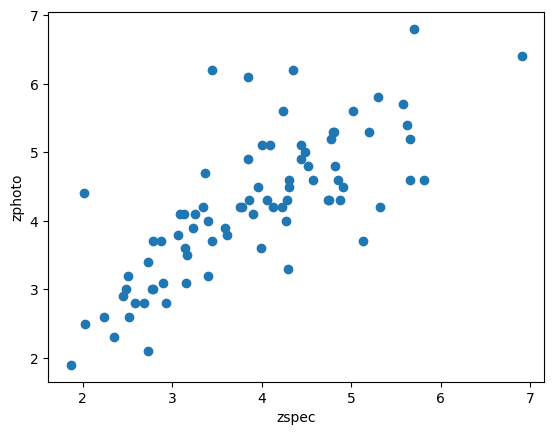

In [3]:
plt.scatter(ALMA_data['zsp'],ALMA_data['zph'])
plt.xlabel('zspec')
plt.ylabel('zphoto')

## Load fits data from Herschel-ATLAS DR1 (HATLAS)
https://cdsarc.cds.unistra.fr/ftp/J/MNRAS/462/3146/ReadMe

In [4]:
ATLAS = fits.open("Herschel_ATLAS.fit")
ATLAS_data = ATLAS[1].data
ATLAS_header = ATLAS[1].header


In [5]:
len(ATLAS_data['zsp'])

26241

(0.0, 2.0)

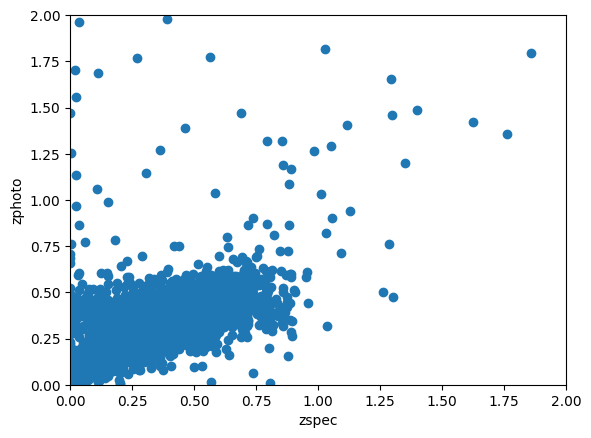

In [270]:
plt.scatter(ATLAS_data['zsp'],ATLAS_data['zph'])
plt.xlabel('zspec')
plt.ylabel('zphoto')

plt.xlim(0,2)
plt.ylim(0,2)


In [7]:
# ATLAS_header

In [8]:
# Convert submm to mJy

ATLAS_data['F250B'] = ATLAS_data['F250B']*1000
ATLAS_data['e_F250B'] = ATLAS_data['e_F250B']*1000


ATLAS_data['F350B'] = ATLAS_data['F350B']*1000
ATLAS_data['e_F350B'] = ATLAS_data['e_F350B']*1000


ATLAS_data['F500B'] = ATLAS_data['F500B']*1000
ATLAS_data['e_F500B'] = ATLAS_data['e_F500B']*1000

In [9]:
# ATLAS_data['FH'] 

In [10]:
# #Convert color mag to flux density in mJy

# def flux_density(ab_mag):
#     return 10 ** ((ab_mag - 23.9) / -2.5)

# def flux_density_error(ab_mag, delta_ab_mag):

#     df_dmag = flux_density(ab_mag)

#     delta_flux = abs(df_dmag) * delta_ab_mag* math.log(10) / 2.5

#     return delta_flux



In [11]:
# i,j,h,r,u

In [19]:
import numpy as np

a = np.array([9, 10, 11])
e_a = np.array([1, 2, 4])

# Create array c with elements drawn from Gaussian distribution
c = np.random.normal(loc=a, scale=e_a)

print(c)


[ 8.12687799  9.7993533  12.02624436]


## Create my own galaxy catalog using available filters, to run it through EAZY Optical Code:

In [45]:
ATLAS_header

XTENSION= 'BINTABLE'           / Binary Table Extension                         
BITPIX  =                    8 / binary data                                    
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  182 / Number of bytes per record                     
NAXIS2  =                26241 / Number of records                              
PCOUNT  =                    0 / Get rid of random parameters                   
GCOUNT  =                    1 / Only one group (isn't it obvious?)             
TFIELDS =                   40 / Number of data fields (columns)                
CDS-CAT = 'J/MNRAS/462/3146'   / Catalogue designation in CDS nomenclature      
         Herschel-ATLAS DR1 (HATLAS) (Valiante+, 2016)                          
EXTNAME = 'J_MNRAS_462_3146_hdr1cat' / Identification of the table              
CDS-NAME= 'J/MNRAS/462/3146/hdr1cat' / Table name in METAtab                    
         HATLAS DR1 Catalogu

In [12]:
ATLAS_data['e_FZ']

array([0.0807112, 0.091652 , 0.0360461, ..., 0.042445 , 0.0208472,
       0.0433142], dtype=float32)

In [211]:



import numpy as np
import pandas as pd

# Create some sample data

header_name=['Seq','Fu','e_Fu','FG','e_FG','FR','e_FR','Fi','e_Fi','FKs','e_FKs','FJ','e_FJ','FH','e_FH','FX','e_FX','FY','e_FY','FZ','e_FZ']

# header_name=['Seq','FB','e_FB','FV','e_FV','FR','e_FR','Fi','e_Fi','FKs','e_FKs']

# header_name=['Seq','Fu','e_Fu','FR','e_FR','Fi','e_Fi','FKs','e_FKs','FJ','e_FJ','FH','e_FH']

# uncertainty_scale = 20



Seq = ATLAS_data['HATLAS']

Fu = ATLAS_data['Fu']

e_Fu = ATLAS_data['e_Fu']

FG = ATLAS_data['FG']
e_FG = ATLAS_data['e_FG']

FR = ATLAS_data['FR']
e_FR = ATLAS_data['e_FR']

Fi = ATLAS_data['FI']
e_Fi = ATLAS_data['e_FI']


FKs = ATLAS_data['Fk']
e_FKs = ATLAS_data['e_Fk']


FJ = ATLAS_data['FJ']
e_FJ = ATLAS_data['e_FJ']


FH = ATLAS_data['FH']
e_FH = ATLAS_data['e_FH']


FX = ATLAS_data['FX']
e_FX = ATLAS_data['e_FX']

FY = ATLAS_data['FY']
e_FY = ATLAS_data['e_FY']


FZ = ATLAS_data['FZ']
e_FZ = ATLAS_data['e_FZ']

# F3_6 = flux_density(cosmos2015_data['_3_6mag'][cosmos2015_filtered_index])
# e_F3_6 = flux_density_error(cosmos2015_data['_3_6mag'][cosmos2015_filtered_index],cosmos2015_data['e_3_6mag'][cosmos2015_filtered_index])

# F4_5 = flux_density(cosmos2015_data['_4_5mag'][cosmos2015_filtered_index])
# e_F4_5 = flux_density_error(cosmos2015_data['_4_5mag'][cosmos2015_filtered_index],cosmos2015_data['e_4_5mag'][cosmos2015_filtered_index])

# F5_8 = flux_density(cosmos2015_data['_5_8mag'][cosmos2015_filtered_index])
# e_F5_8 = flux_density_error(cosmos2015_data['_5_8mag'][cosmos2015_filtered_index],cosmos2015_data['e_5_8mag'][cosmos2015_filtered_index])

# F8_0 = flux_density(cosmos2015_data['_8_0mag'][cosmos2015_filtered_index])
# e_F8_0 = flux_density_error(cosmos2015_data['_8_0mag'][cosmos2015_filtered_index],cosmos2015_data['e_8_0mag'][cosmos2015_filtered_index])

# e_Jmag = cosmos2015_data['e_Jmag'][cosmos2015_filtered_index]

# F250_Dublended = Dub_data['F250'][FIR_indices_in_dublended]

z_photo = ATLAS_data['zph']
z_spec = ATLAS_data['zsp']

F250 = ATLAS_data['F250B']
e_F250 = ATLAS_data['e_F250B']

F350 = ATLAS_data['F350B']
e_F350 = ATLAS_data['e_F350B']

F500 = ATLAS_data['F500B']
e_F500 = ATLAS_data['e_F500B']



# Combine the data into a single array
# combined_data = np.vstack((Seq,FB,e_FB,FV,e_FV,FR,e_FR,Fi,e_Fi,FKs, e_FKs  )).T
combined_data = np.vstack((Seq,Fu,e_Fu,FG,e_FG,FR,e_FR,Fi,e_Fi,FKs, e_FKs, FJ, e_FJ, FH, e_FH,FX,e_FX,FY,e_FY,FZ,e_FZ )).T


# Create a Pandas DataFrame from the combined data
df = pd.DataFrame(combined_data, columns= header_name)
                  

# Save the DataFrame to a CSV file
df.to_csv('zfourge.uds.zspec.vizier_HATLAS.csv', index=False)



## ###############################
# OPTICAL PHOTOMETRY USING EAZY
## ###############################

In [14]:
params = {}
params['CATALOG_FILE'] = os.path.join(str(os.getenv('EAZYCODE')), '/inputs/hdfn_fs99_eazy.cat')

params['MAIN_OUTPUT_FILE'] = 'hdfn.eazypy'

# Galactic extinction
params['MW_EBV'] = 0.0103
params['CAT_HAS_EXTCORR'] = True

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 6.

params['PRIOR_ABZP'] = 25 
params['PRIOR_FILTER'] = 28 # K
params['PRIOR_FILE'] = 'templates/prior_K_TAO.dat'

params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'

params['FIX_ZSPEC'] = False

params['IGM_SCALE_TAU'] = 1.0

translate_file = os.path.join(str(os.getenv('EAZYCODE')), 'inputs/zphot.translate')


In [15]:
# translate_file

In [336]:
# field = 'cdfs'
field = 'uds'


# Bright mag to limit catalog size
MAX_KMAG = 22.5
cat_name = f'zfourge.{field}.zspec.vizier_HATLAS.csv'


print(cat_name)

zfourge.uds.zspec.vizier_HATLAS.csv


In [17]:
#### Update parameters

# Predefined translate file
trans_name = f'zfourge.{field}.vizier.translate.csv'
# csv_trans = pd.read_csv(f'https://erda.ku.dk/vgrid/Gabriel%20Brammer/Catalogs/{trans_name}')
# csv_trans.to_csv(trans_name, index=False)

# New parameters
# params['MW_EBV'] = eazy.utils.get_irsa_dust(np.nanmedian(zf['ra']), np.nanmedian(zf['dec']))

params['CATALOG_FILE'] = cat_name
params['PRIOR_ABZP'] = 25
params['CATALOG_FORMAT'] = 'csv'
params['PRIOR_FILTER'] = 255
#params['TEMPLATES_FILE'] = 'templates/spline_templates_v2/tweak_spline.param'
params['MAIN_OUTPUT_FILE'] = f'zfourge.{field}'

params['SYS_ERR'] = 0.03

params['Z_MAX'] = 12.
params['Z_STEP'] = 0.005

translate_file = trans_name

In [18]:
self = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/ptanouri/Library/Python/3.9/lib/python/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: zfourge.uds.zspec.vizier_HATLAS.csv
   >>> NOBJ = 26241
FKs e_FKs (255): FOURSTAR/Ks_cam_optics_sky.txt
Fu e_Fu ( 88): megaprime/cfht_mega_u_cfh9301.dat
FR e_FR (123): UKIDSS/R_qe.txt
Fi e_Fi (124): UKIDSS/i_qe.txt
FY e_FY (266): VLT/hawki_y_ETC.dat
FJ e_FJ (263): UKIDSS/Table04_online.dat
FH e_FH (264): UKIDSS/Table05_online.dat
Set sys_err = 0.03 (positive=True)
Read PRIOR_FILE:  templates/prior_K_TAO.dat
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


100%|███████████████████████████████████████████████████| 12/12 [00:19<00:00,  1.62s/it]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 20.028 s


511it [00:01, 330.28it/s]


Iteration:  0


100%|█████████████████████████████████████████████████| 511/511 [06:36<00:00,  1.29it/s]


Compute best fits
fit_best: 5.9 s (n_proc=2,  NOBJ=26143)
Fit 406.2 s (n_proc=8, NOBJ=26227)
Iterative correction - zeropoint / template
Iteration:  1


100%|█████████████████████████████████████████████████| 511/511 [06:24<00:00,  1.33it/s]


Compute best fits
fit_best: 3.4 s (n_proc=2,  NOBJ=26147)
Fit 389.9 s (n_proc=8, NOBJ=26227)
Iterative correction - zeropoint / template
Iteration:  2


100%|█████████████████████████████████████████████████| 511/511 [05:53<00:00,  1.45it/s]


Compute best fits
fit_best: 3.7 s (n_proc=2,  NOBJ=26155)
Fit 359.9 s (n_proc=8, NOBJ=26227)
Iterative correction - zeropoint / template


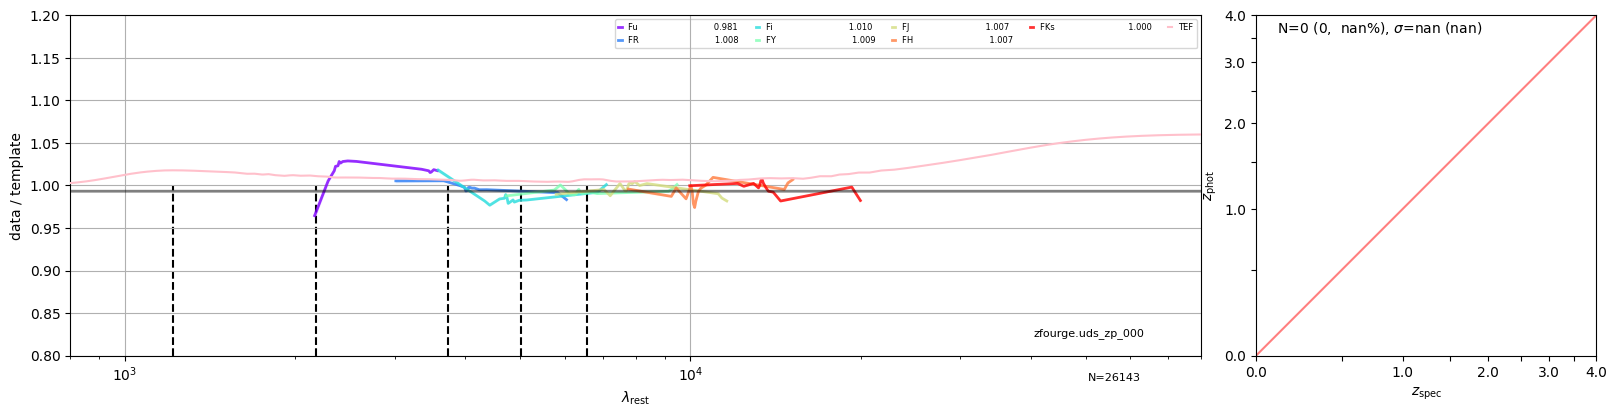

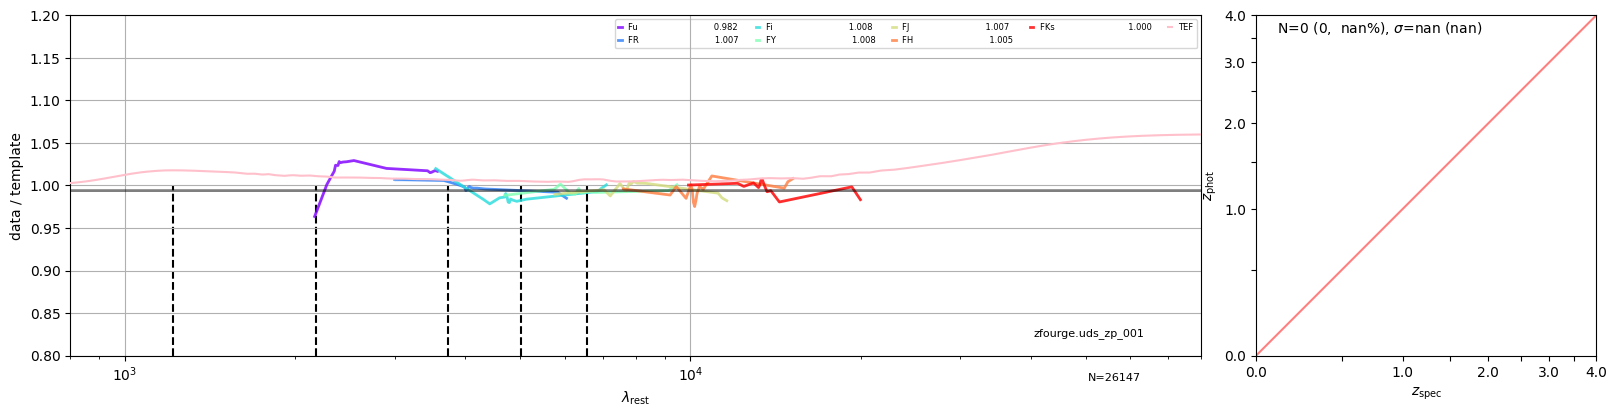

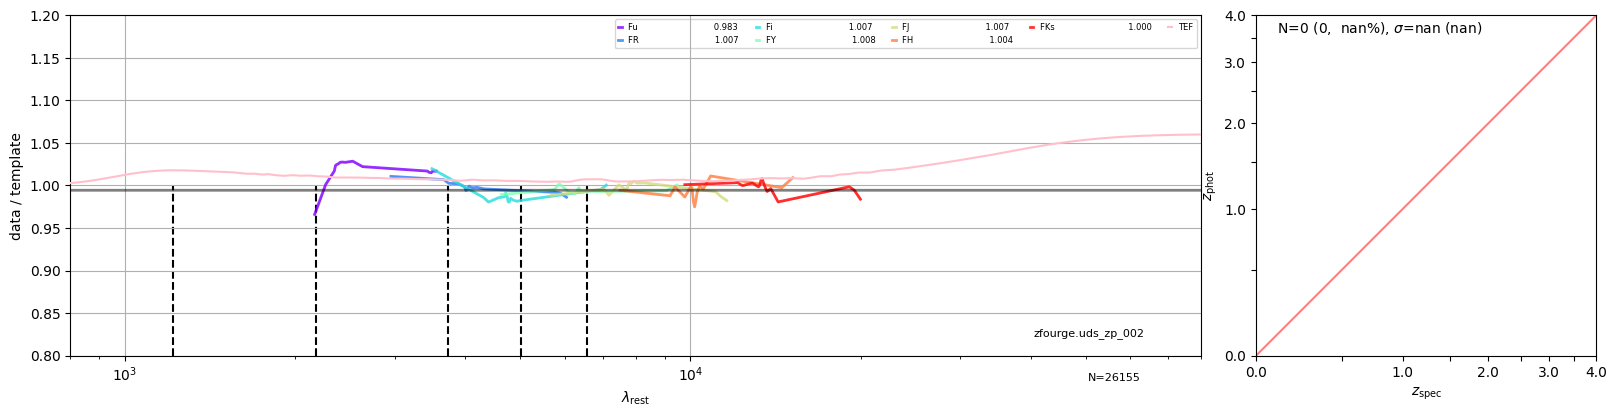

In [19]:
NITER = 3
NBIN = np.minimum(self.NOBJ//100, 180)

self.param.params['VERBOSITY'] = 1.
for iter in range(NITER):
    print('Iteration: ', iter)
    
    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False, 
                              update_zeropoints=True, iter=iter, n_proc=8, 
                              save_templates=False, error_residuals=False, 
                              NBIN=NBIN, get_spatial_offset=False)

In [20]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

Set sys_err = 0.03 (positive=True)


100%|█████████████████████████████████████████████████| 511/511 [06:36<00:00,  1.29it/s]


Compute best fits
fit_best: 3.8 s (n_proc=2,  NOBJ=26109)
Fit 402.4 s (n_proc=8, NOBJ=26241)


### Example of a redshift probability density from EAZY (PDF on y-axis, redshift grid on x-axis)

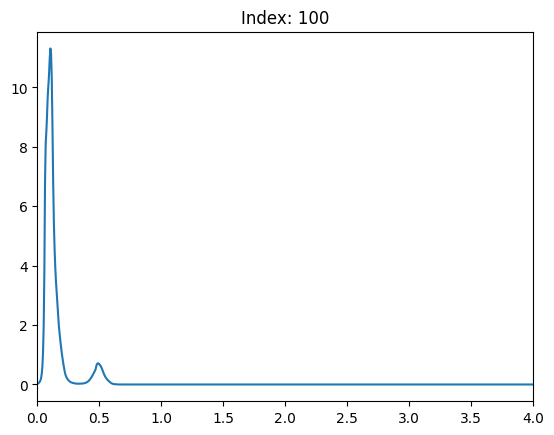

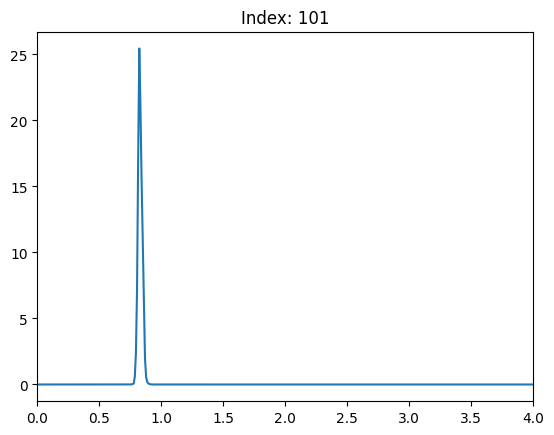

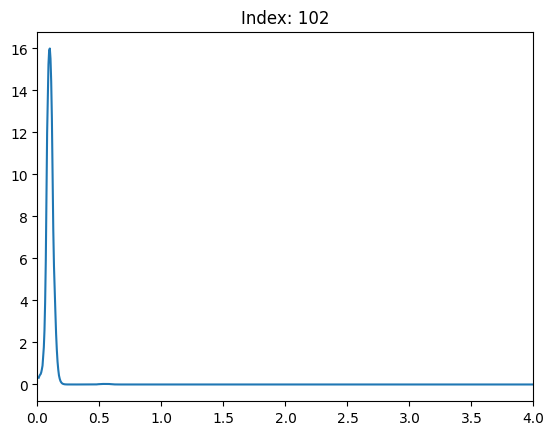

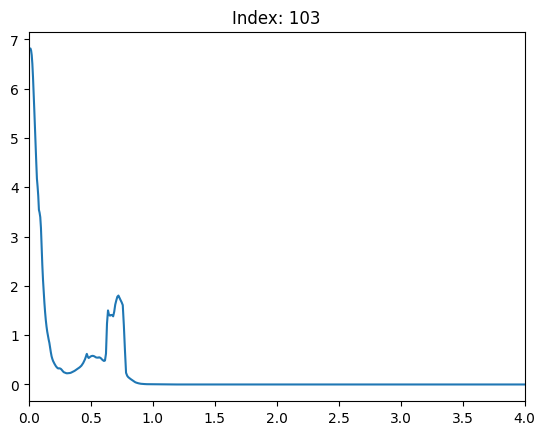

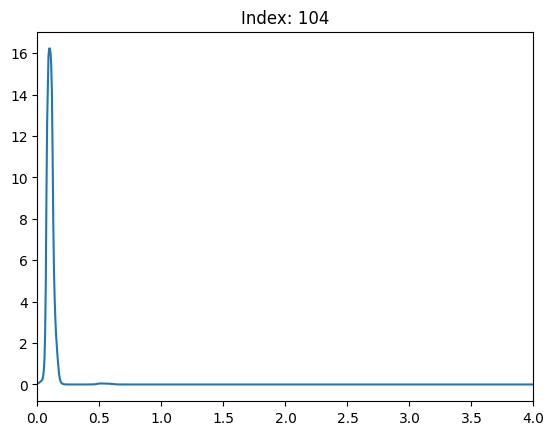

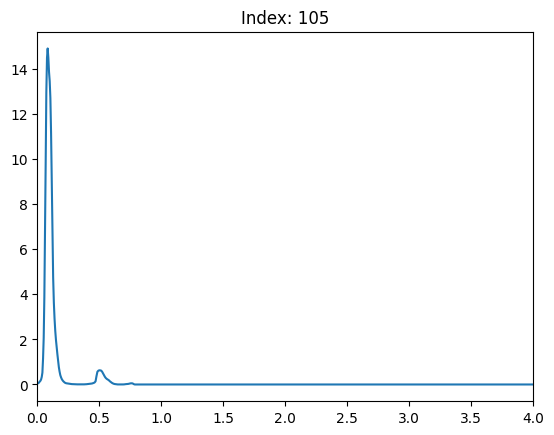

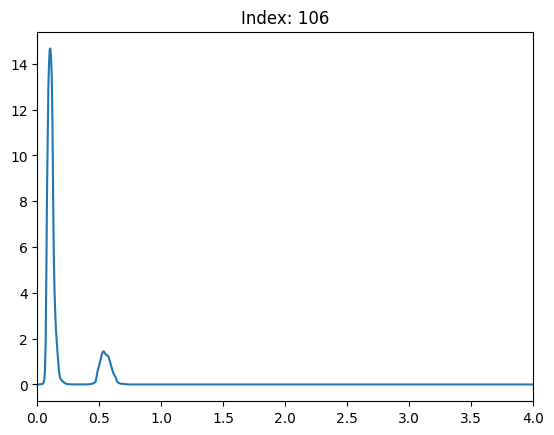

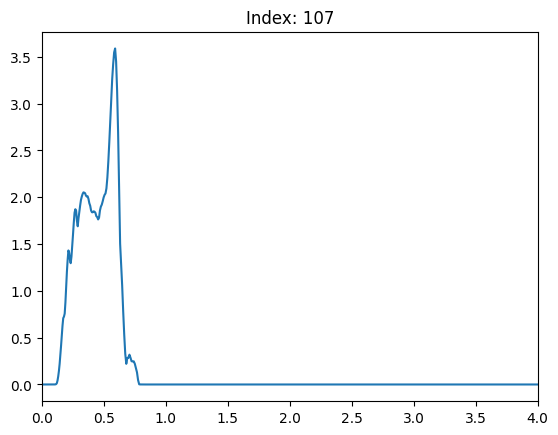

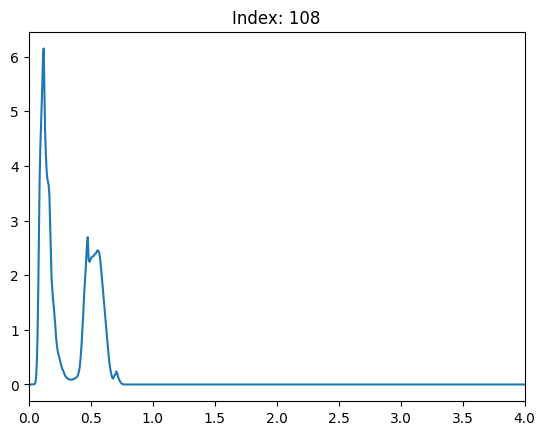

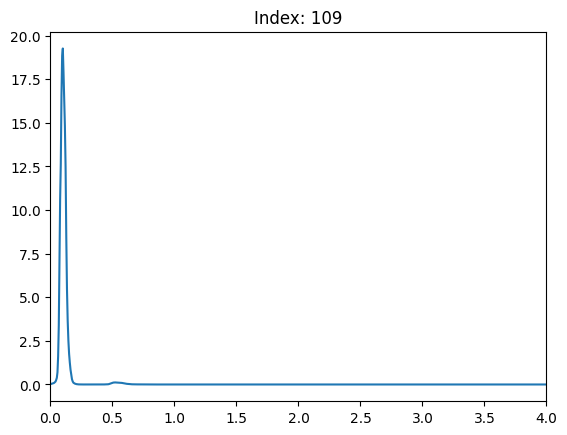

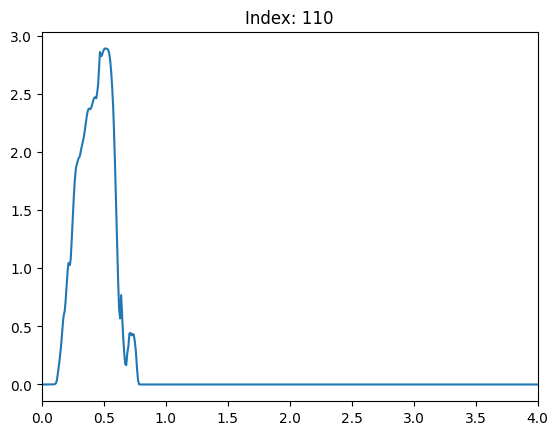

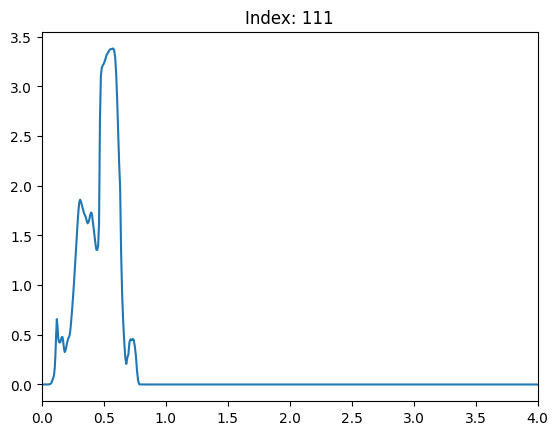

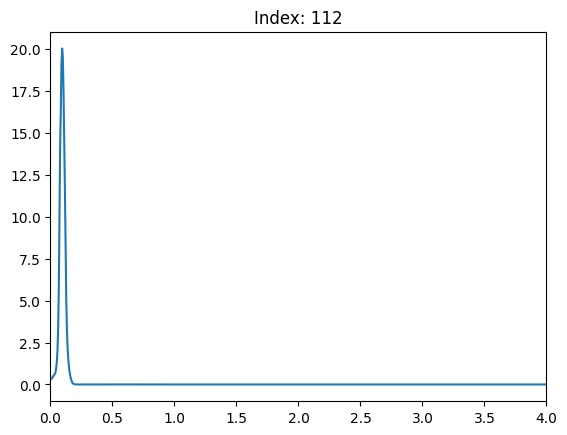

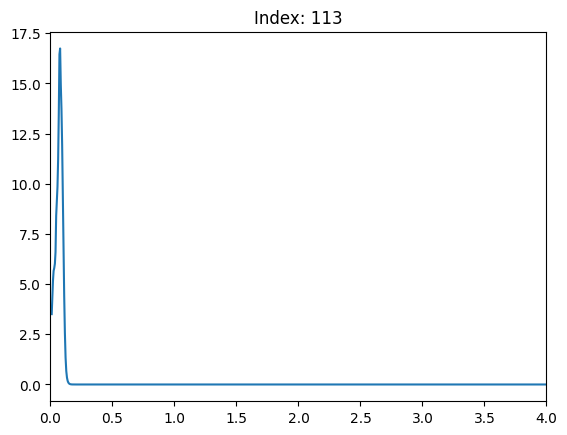

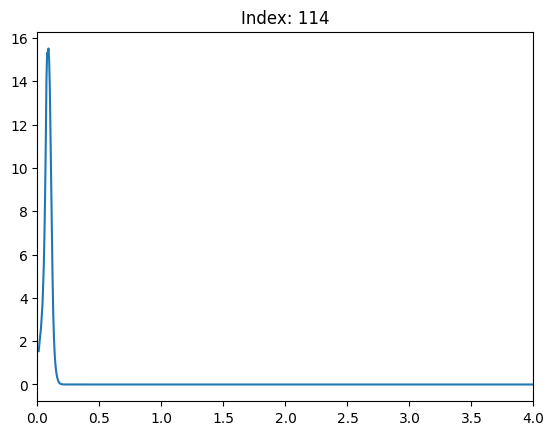

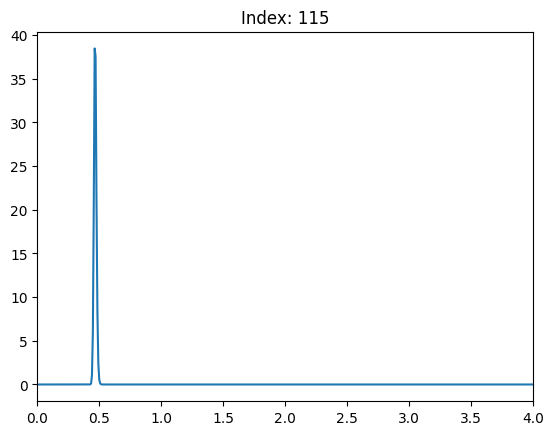

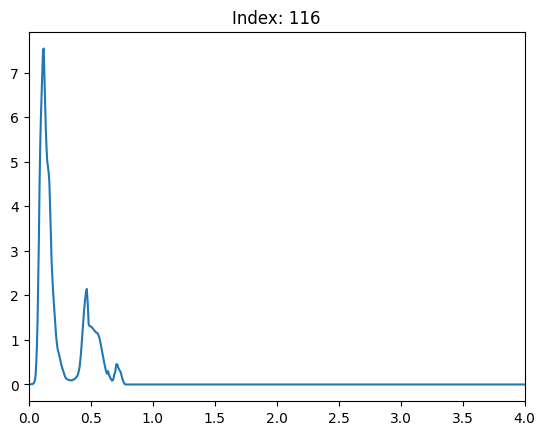

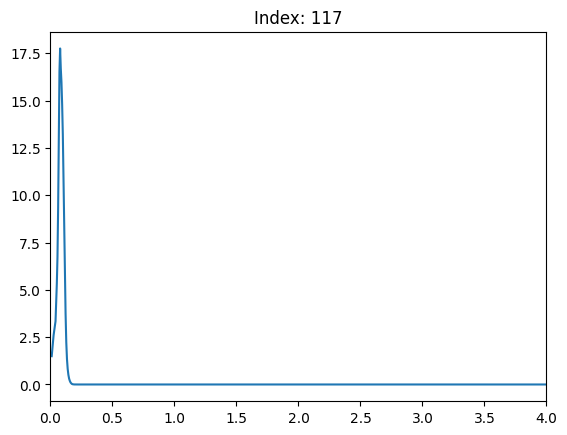

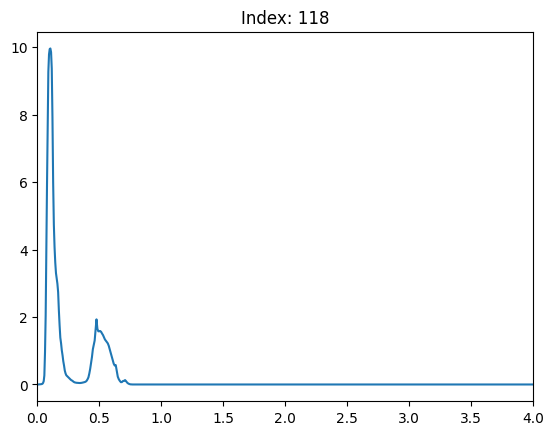

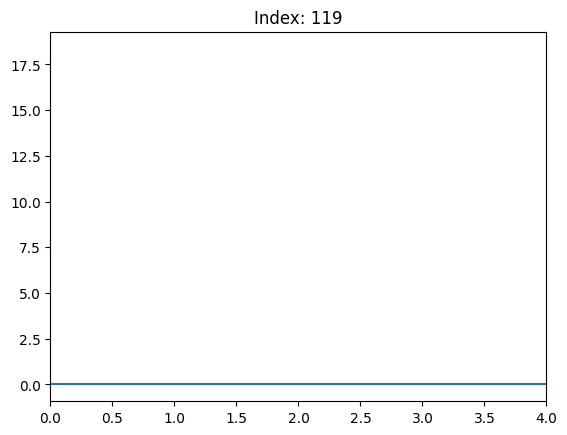

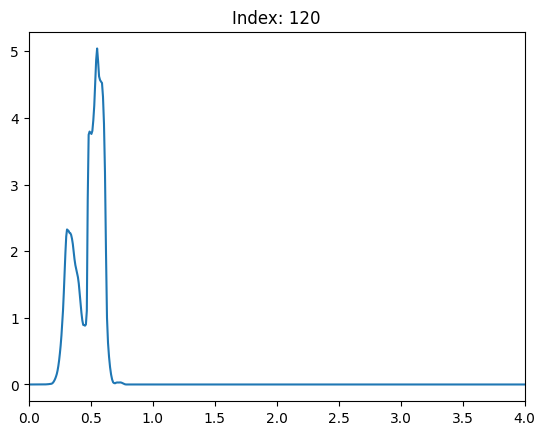

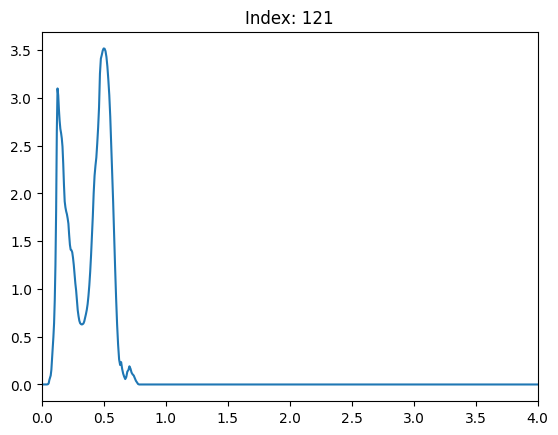

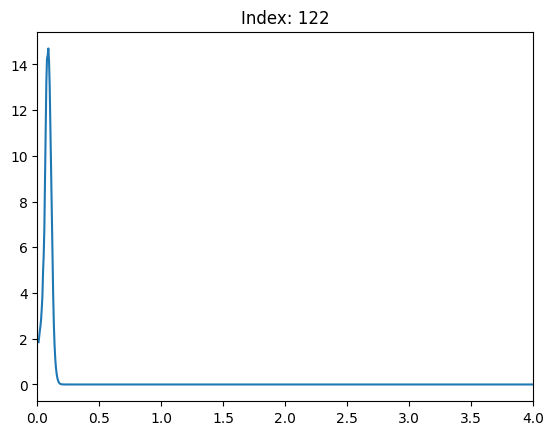

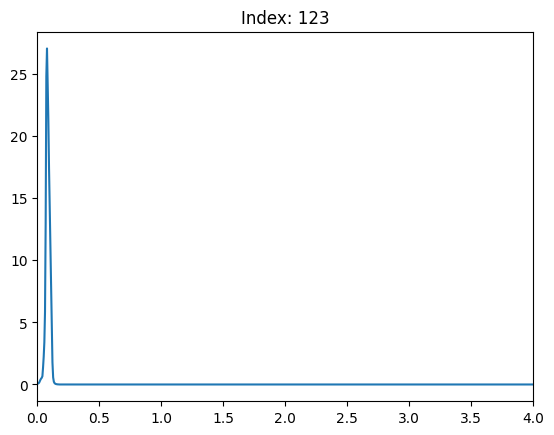

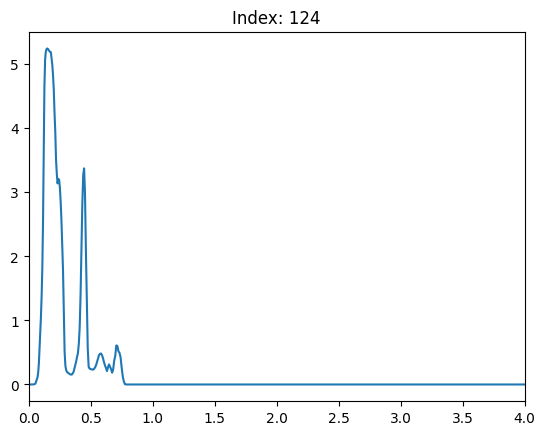

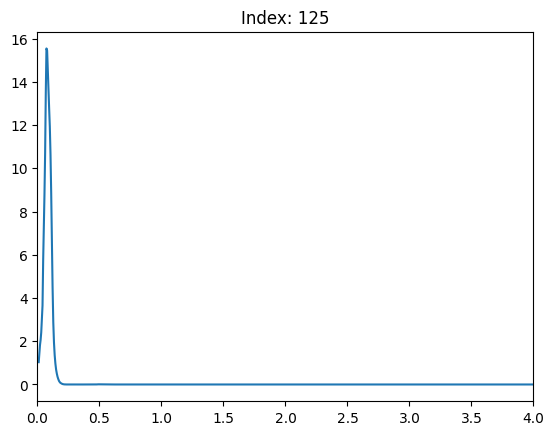

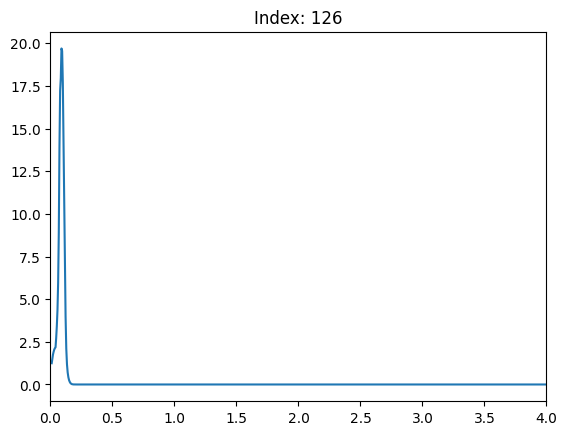

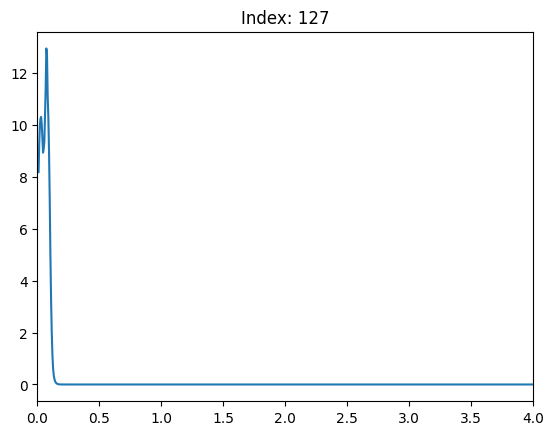

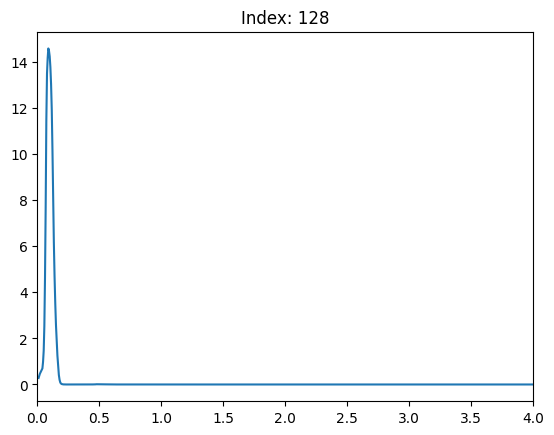

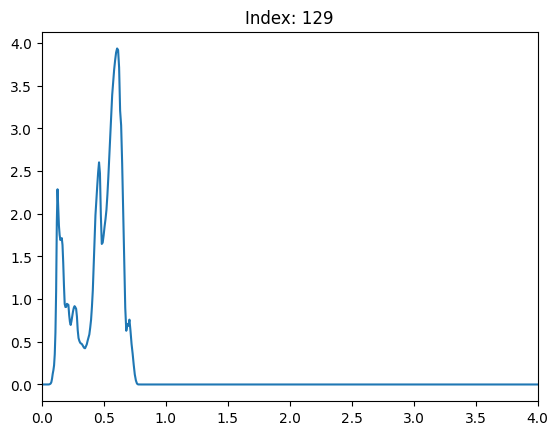

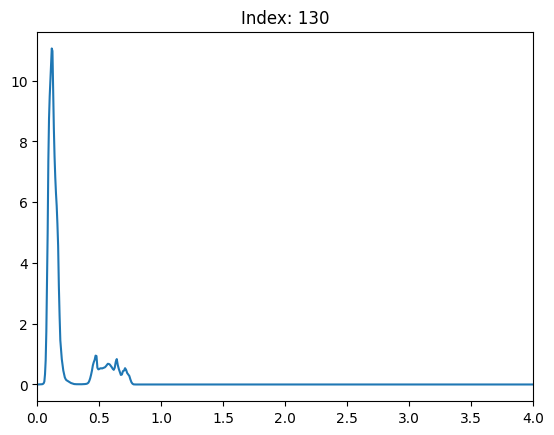

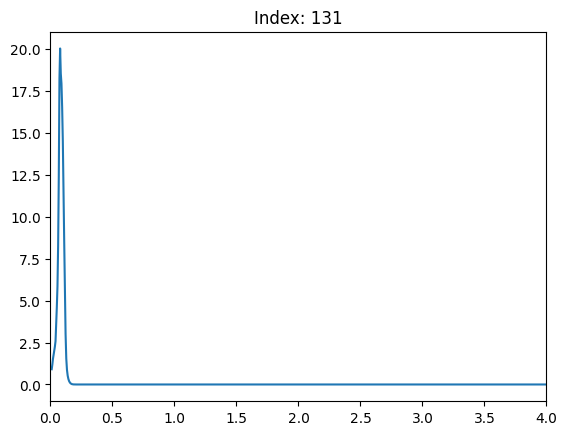

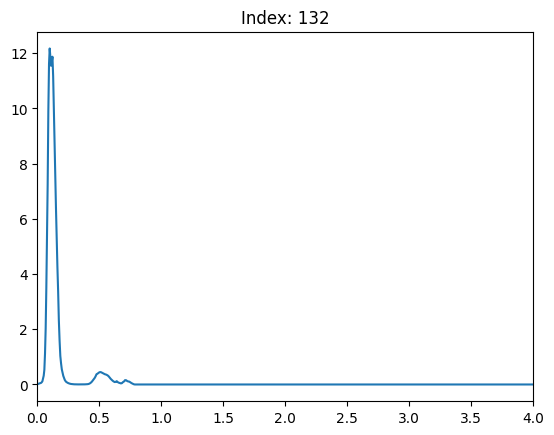

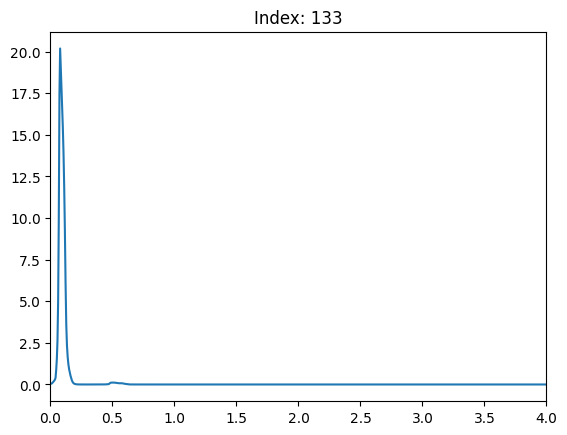

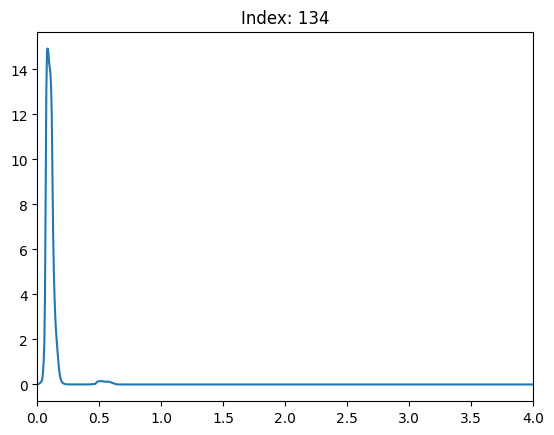

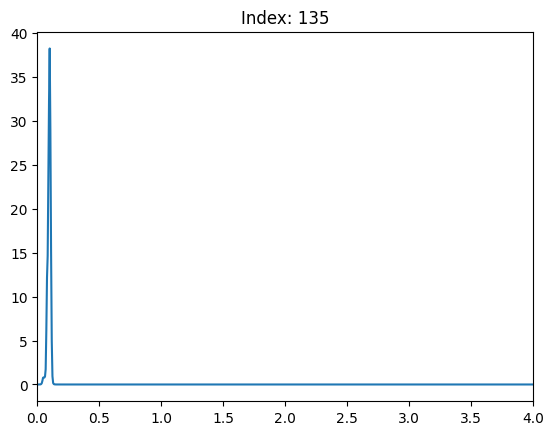

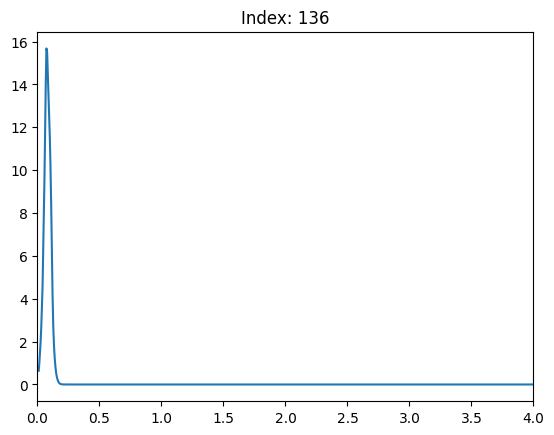

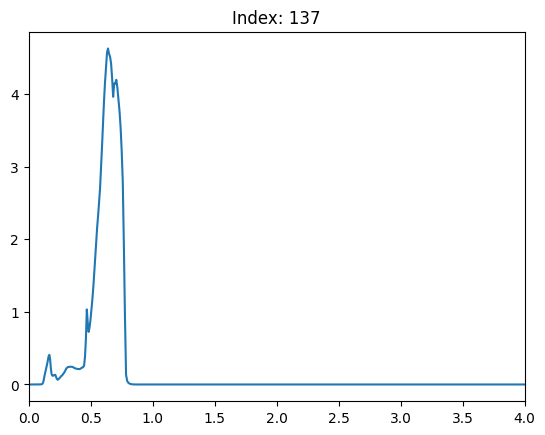

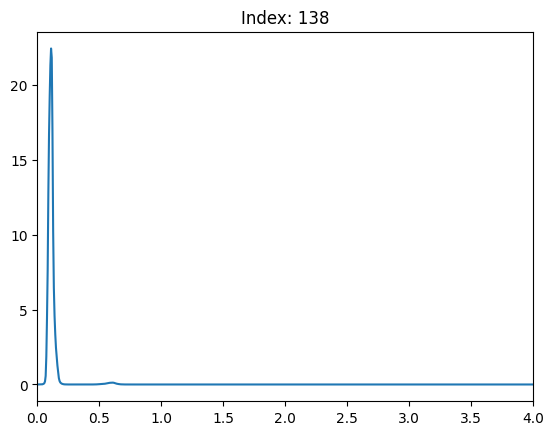

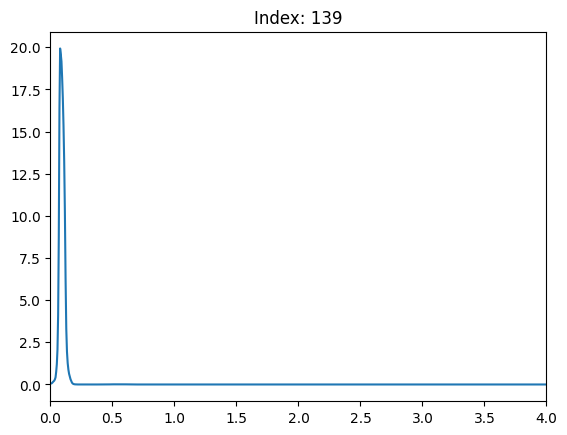

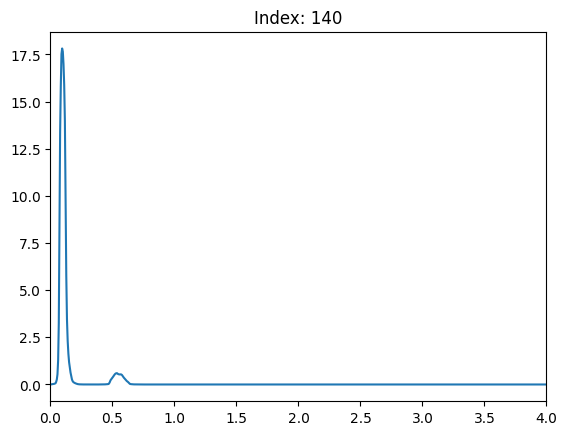

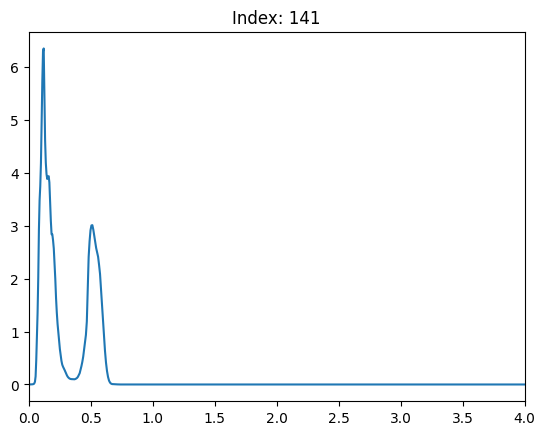

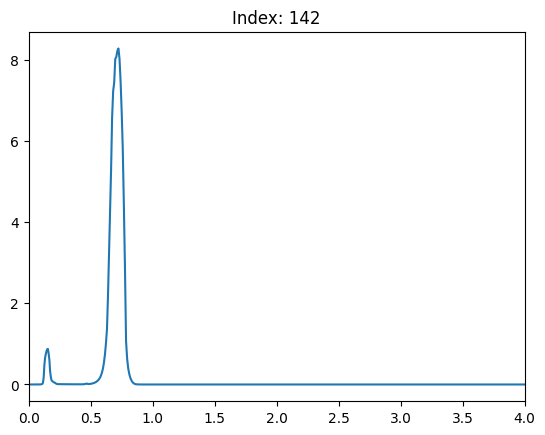

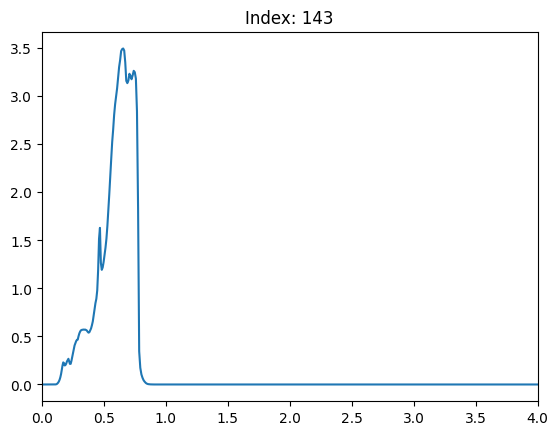

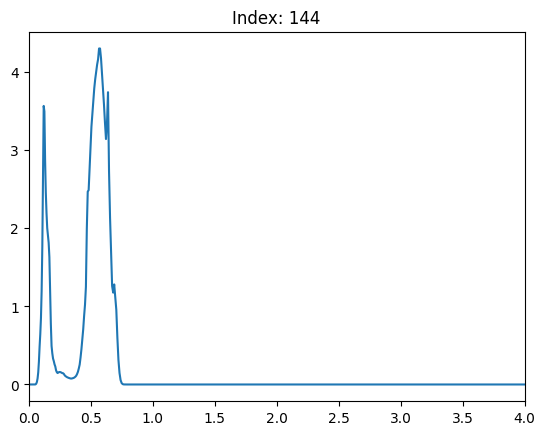

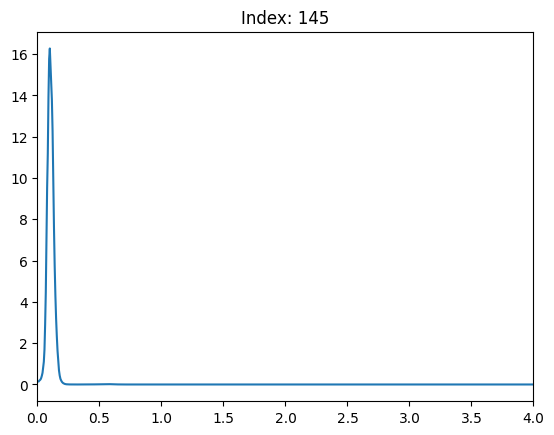

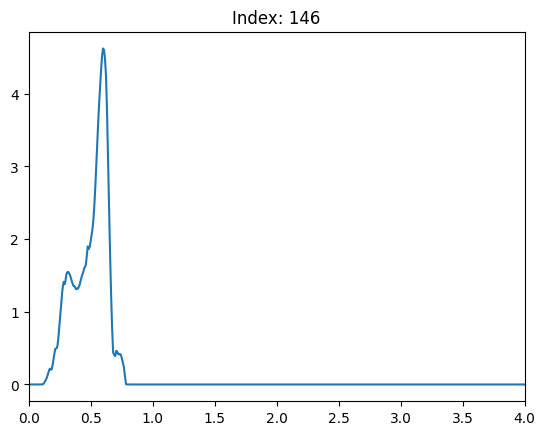

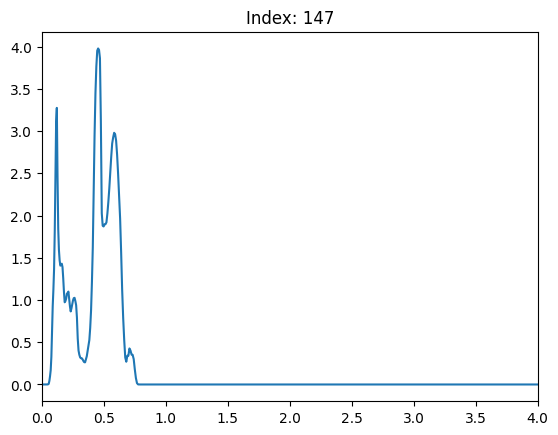

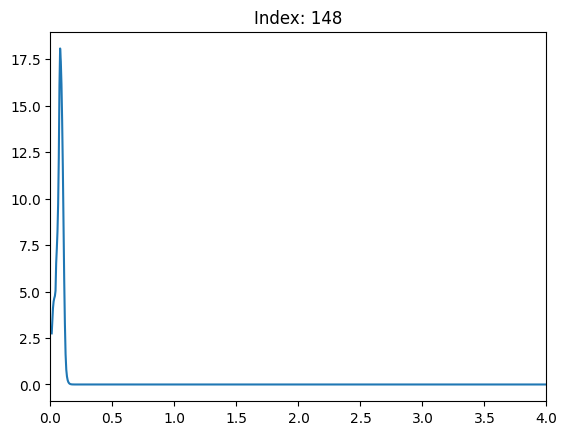

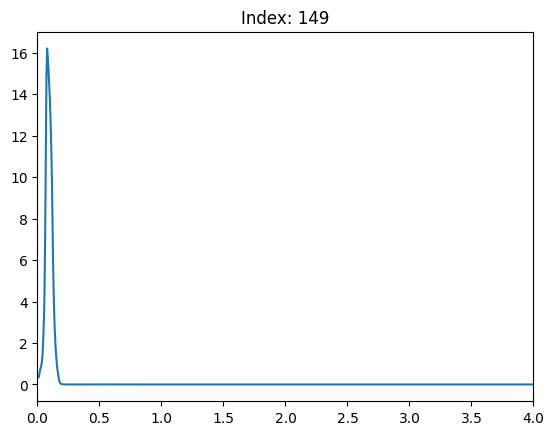

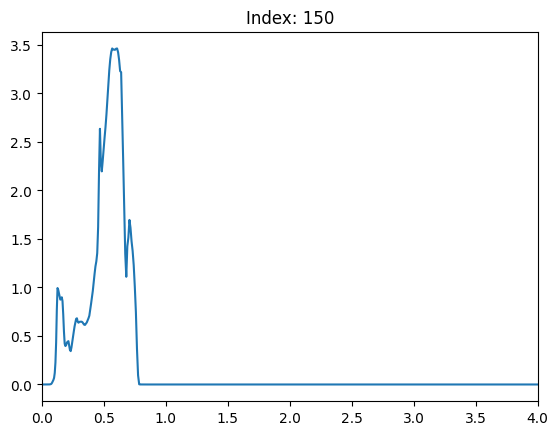

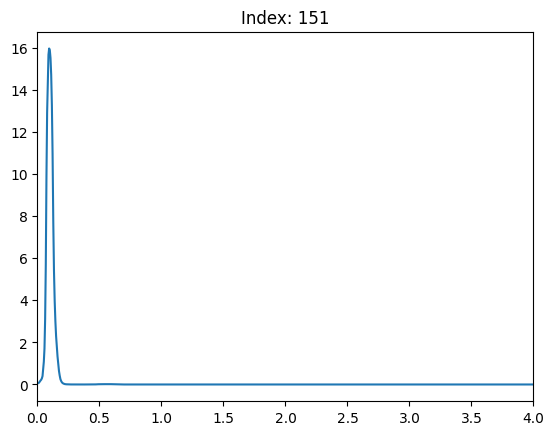

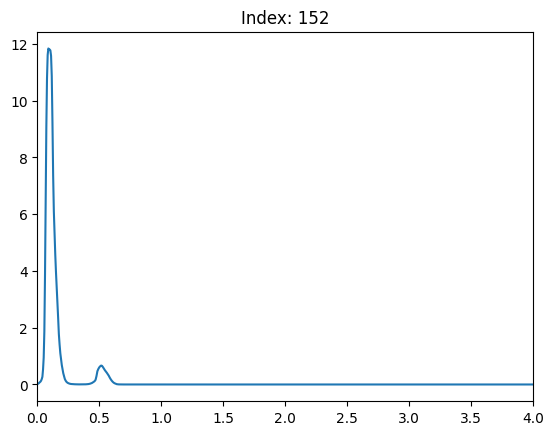

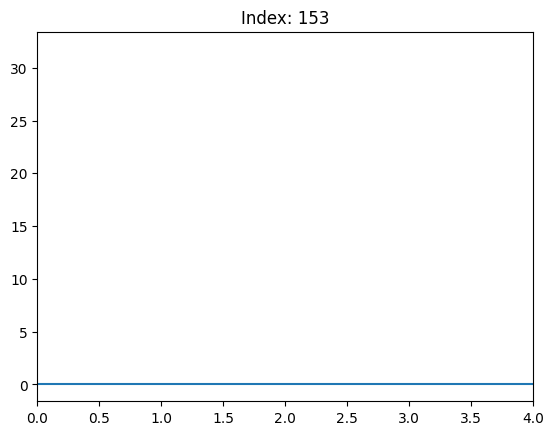

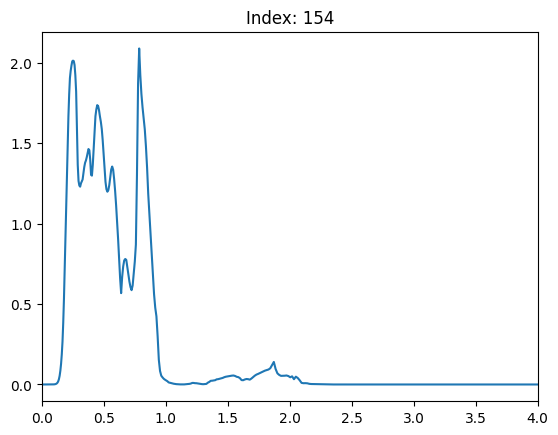

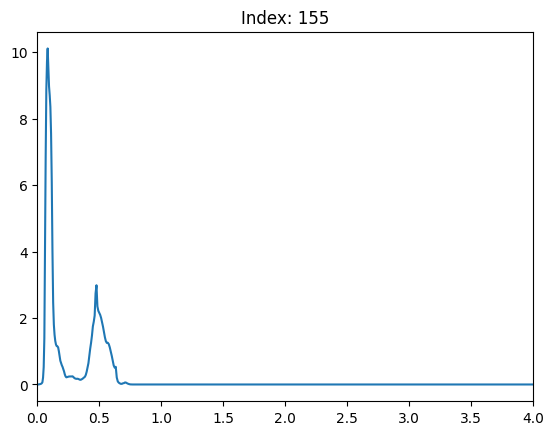

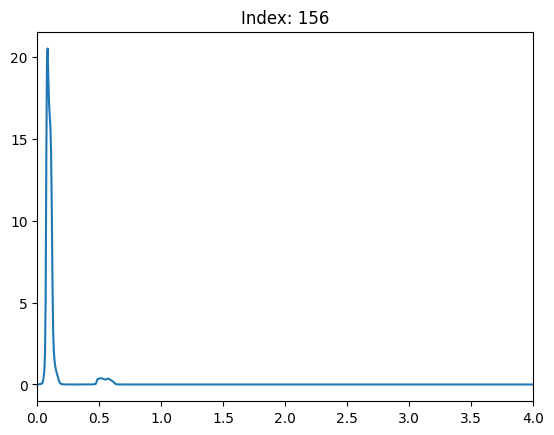

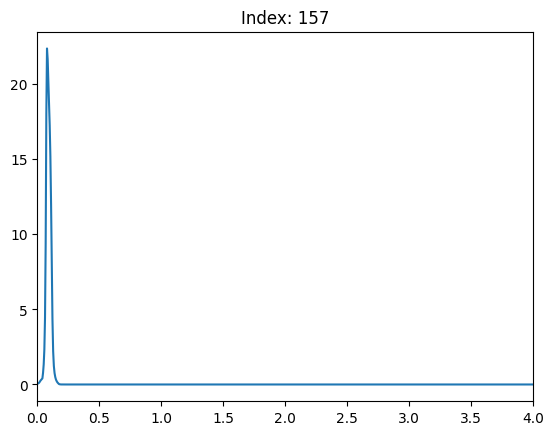

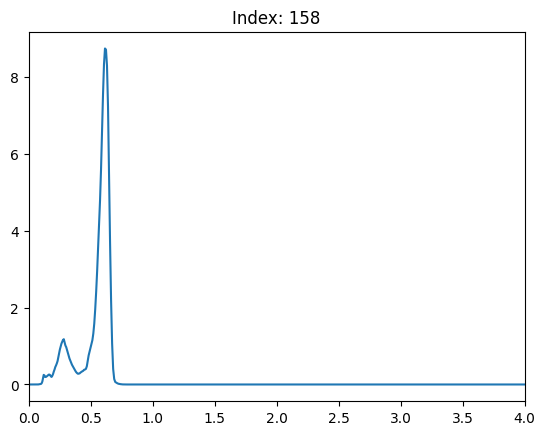

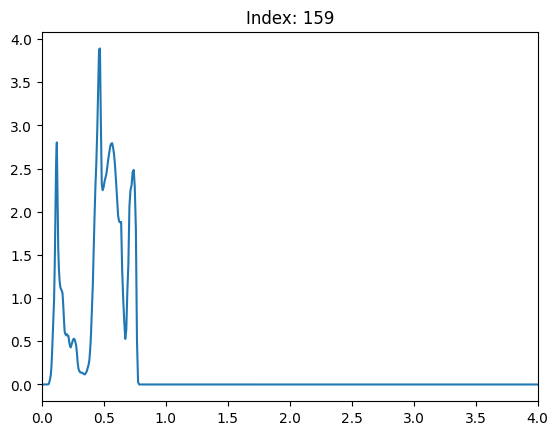

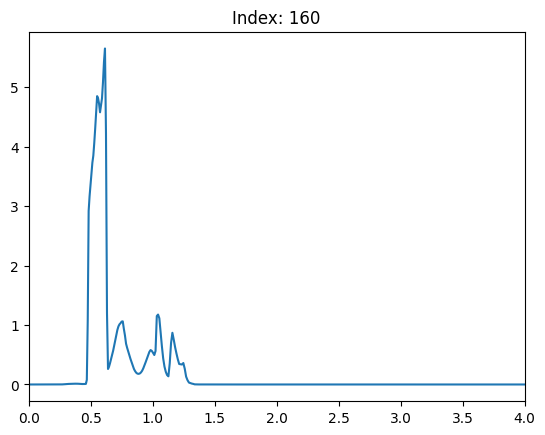

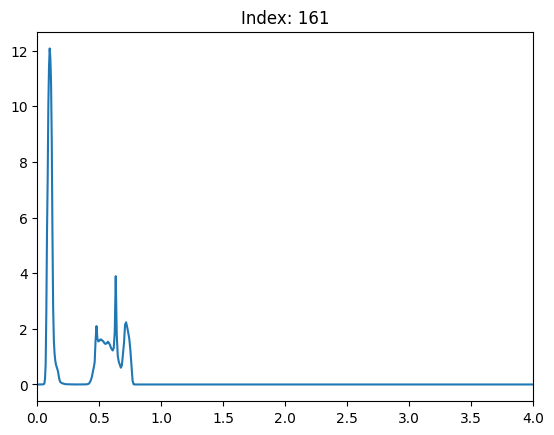

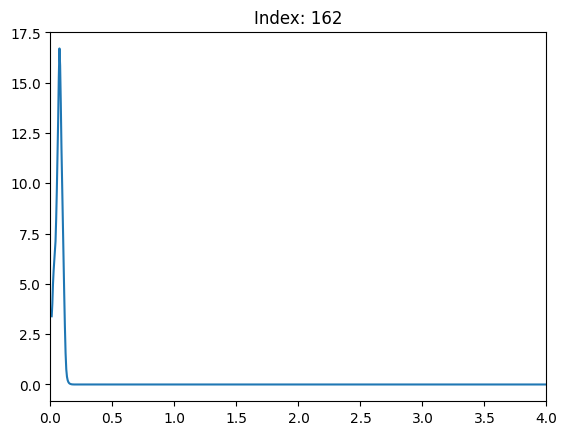

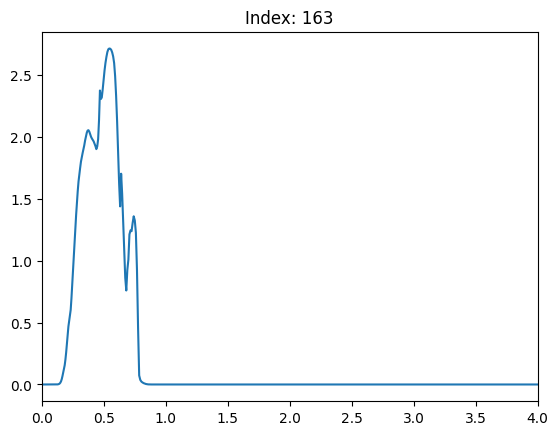

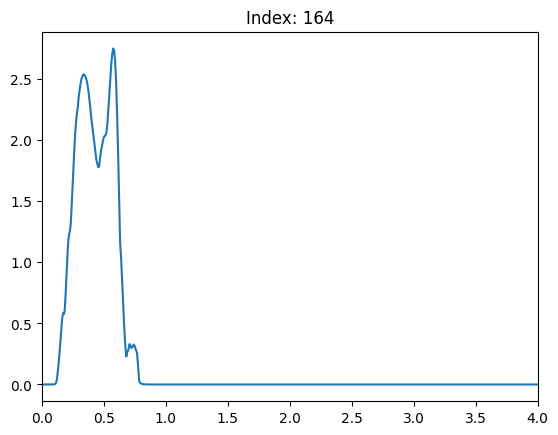

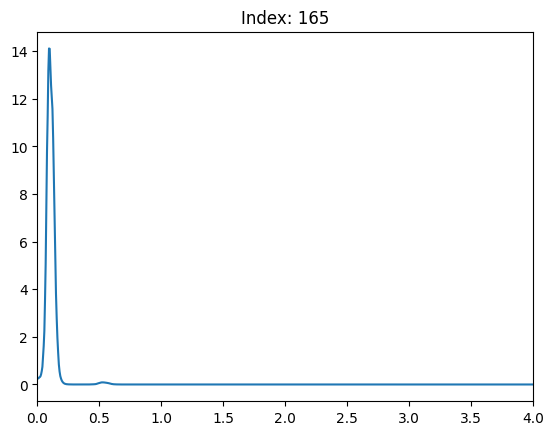

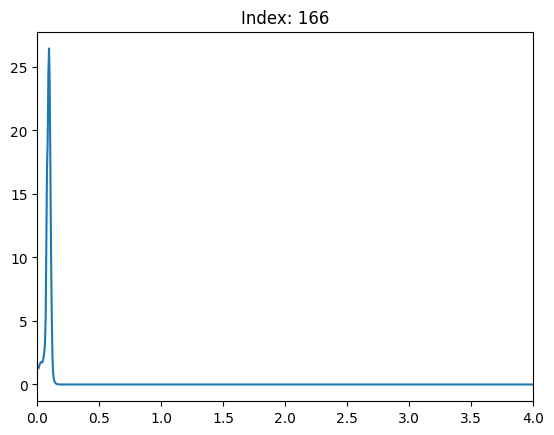

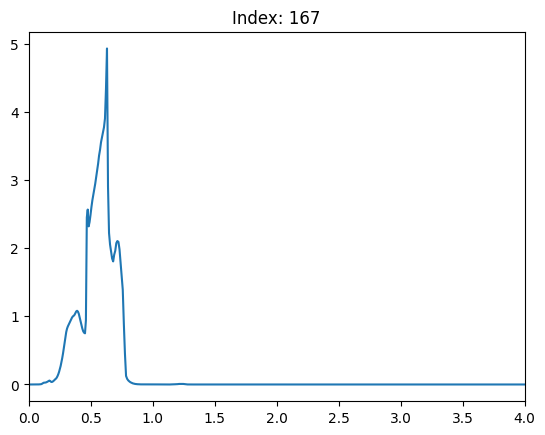

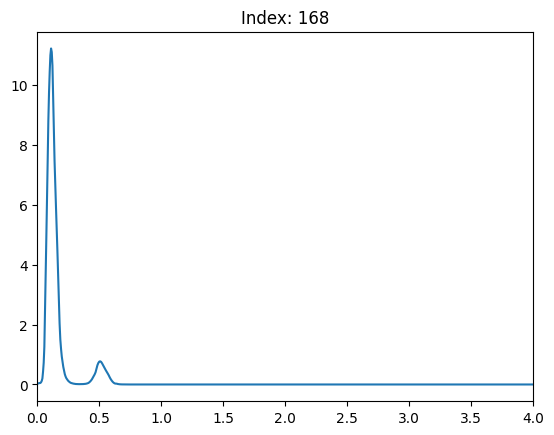

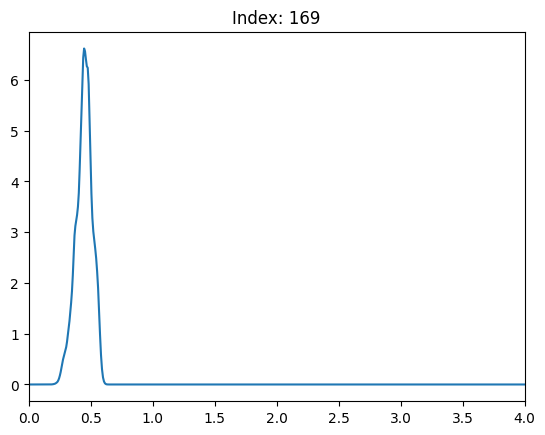

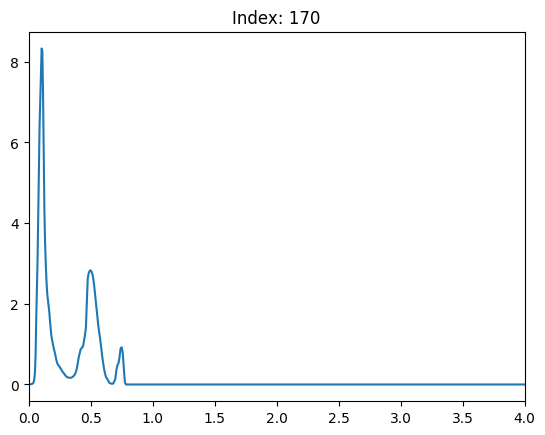

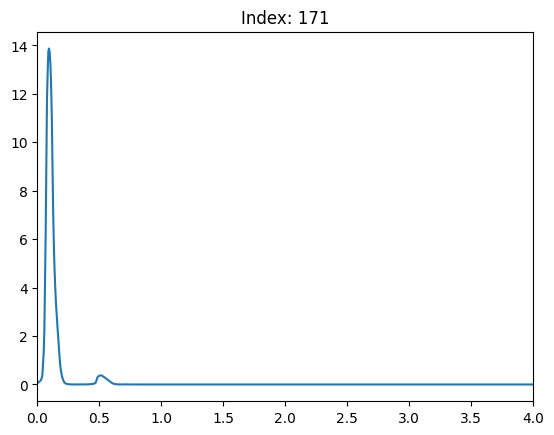

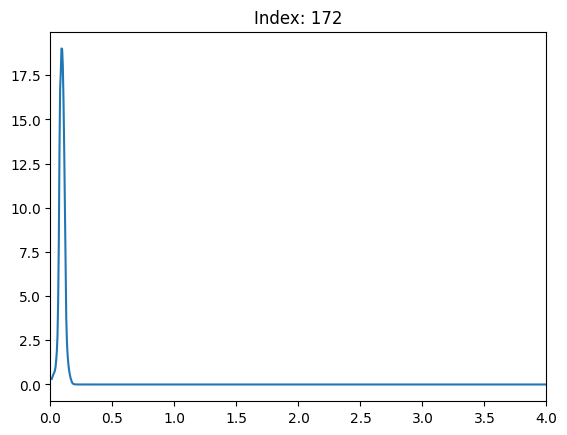

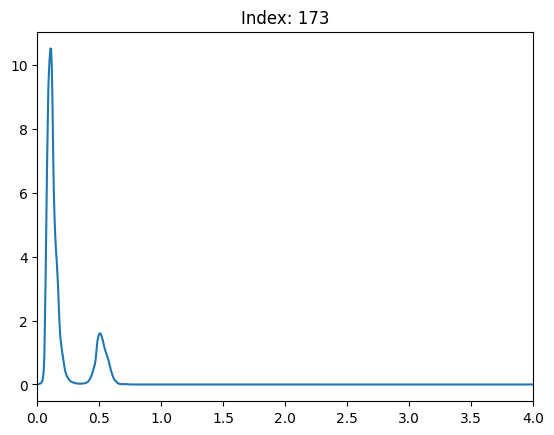

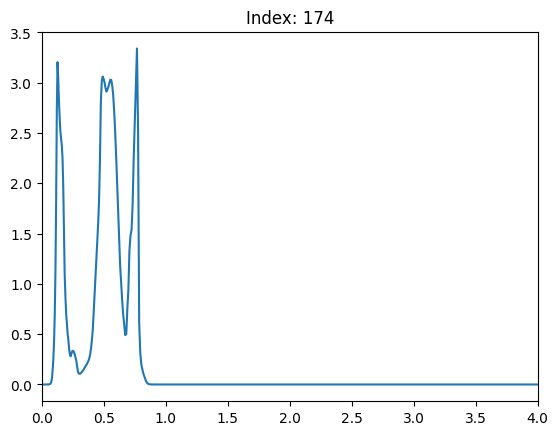

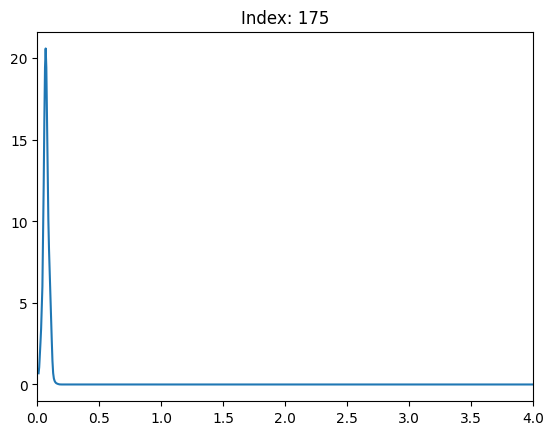

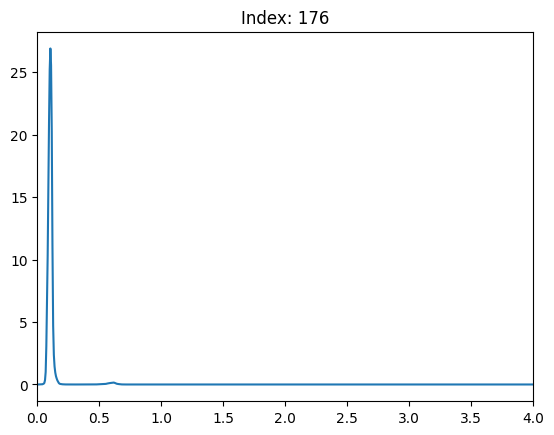

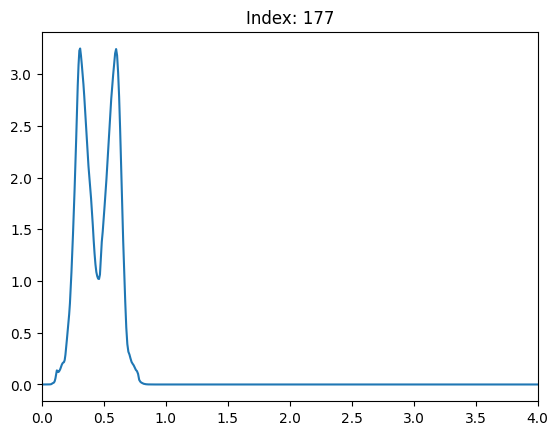

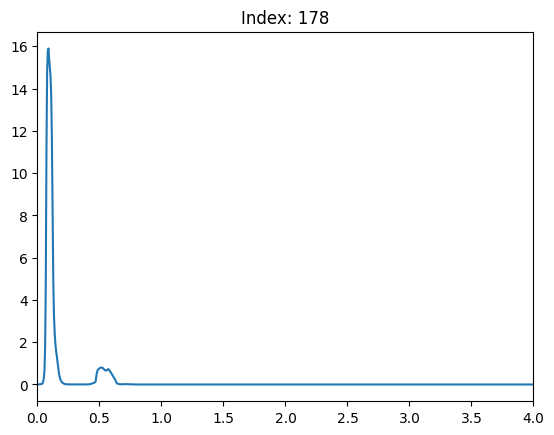

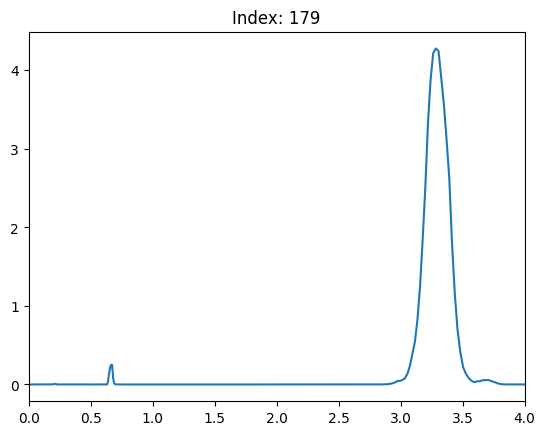

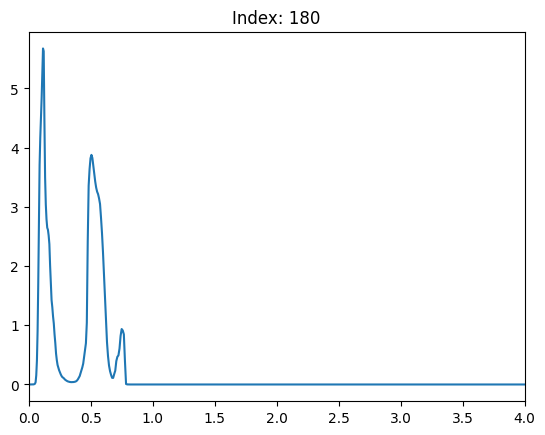

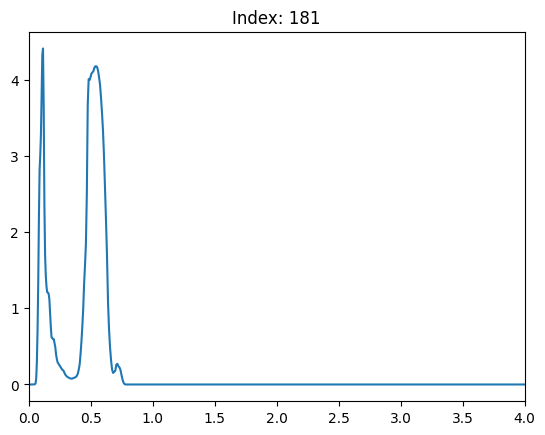

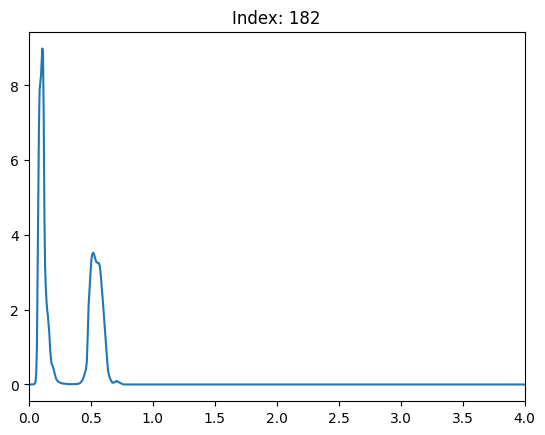

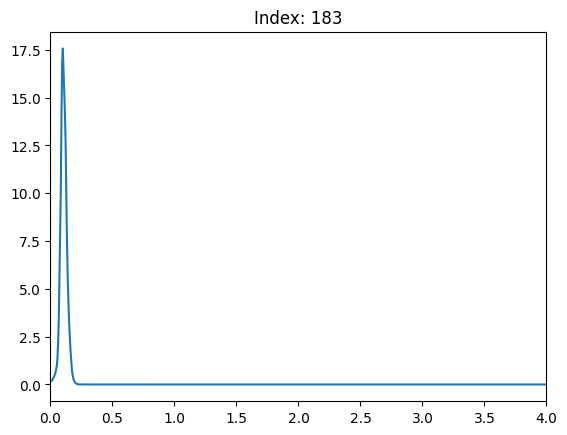

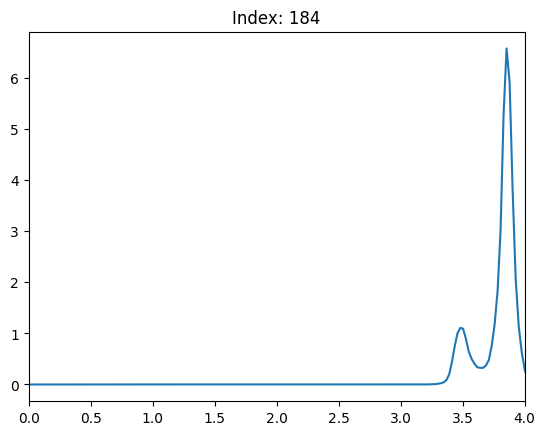

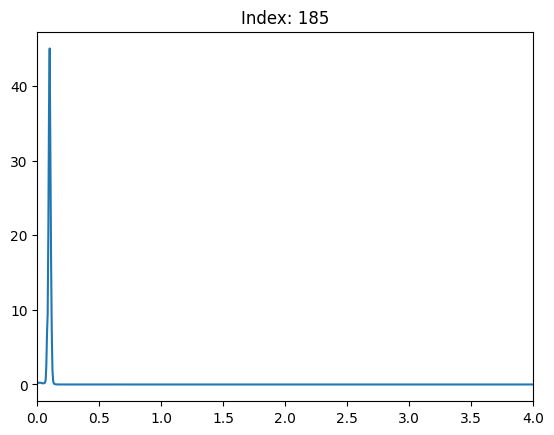

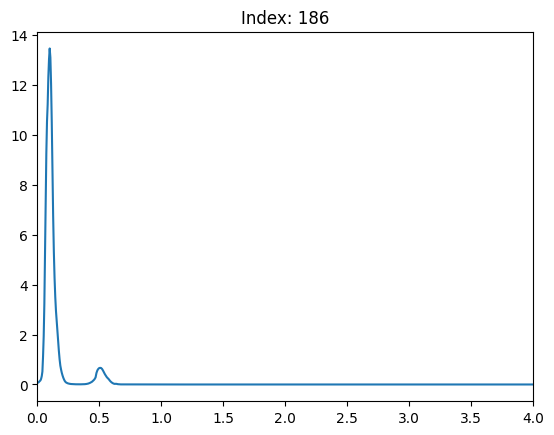

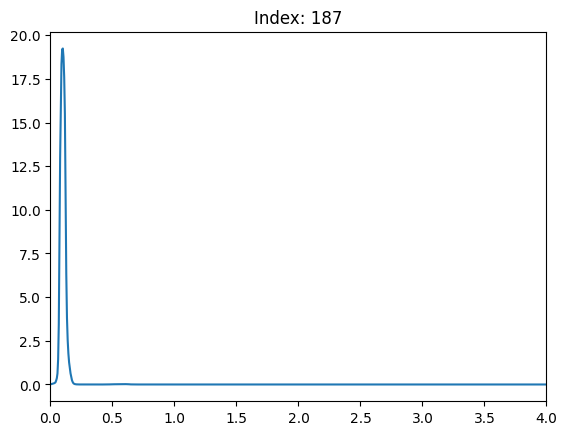

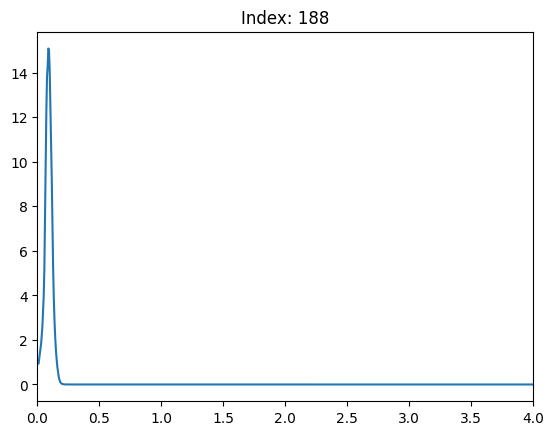

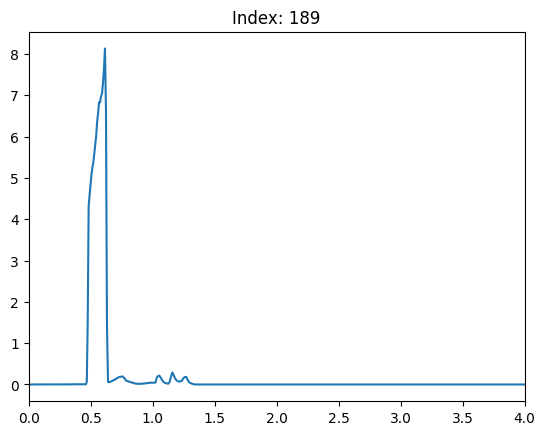

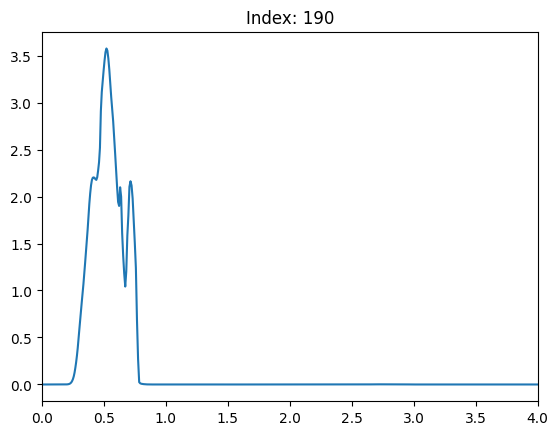

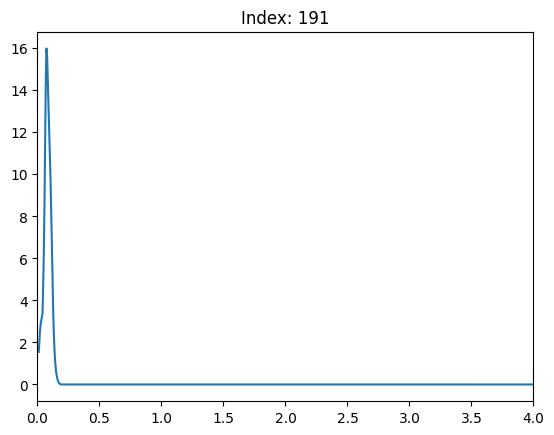

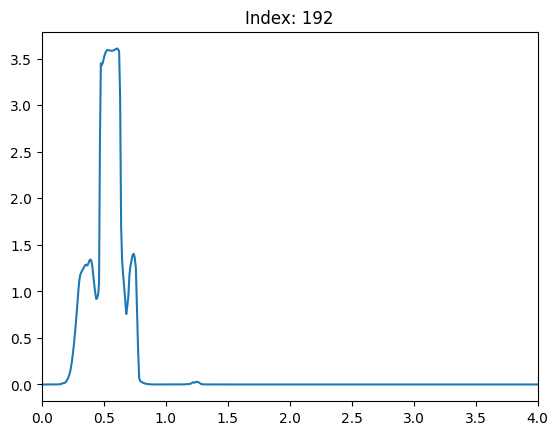

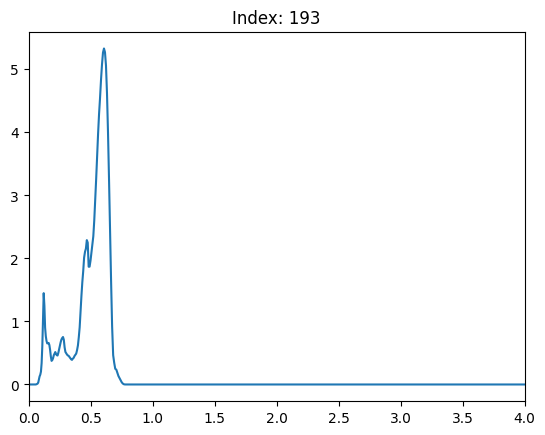

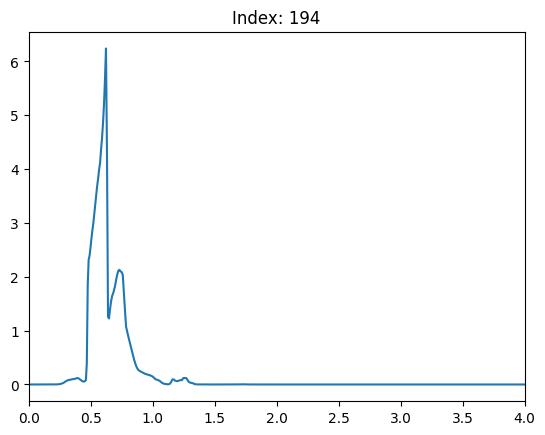

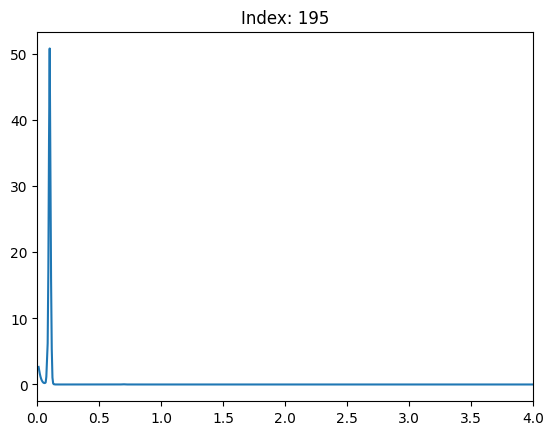

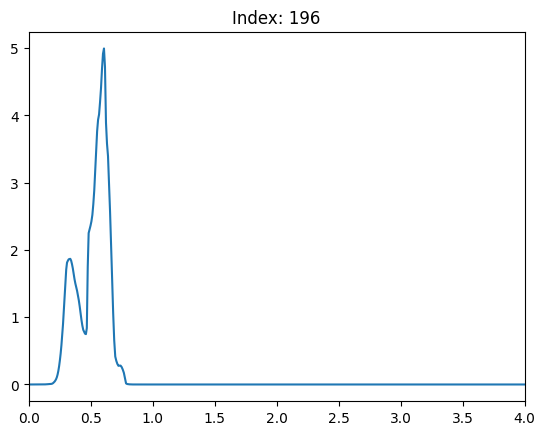

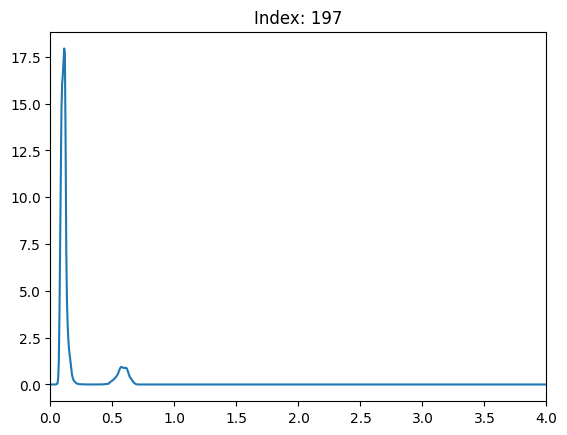

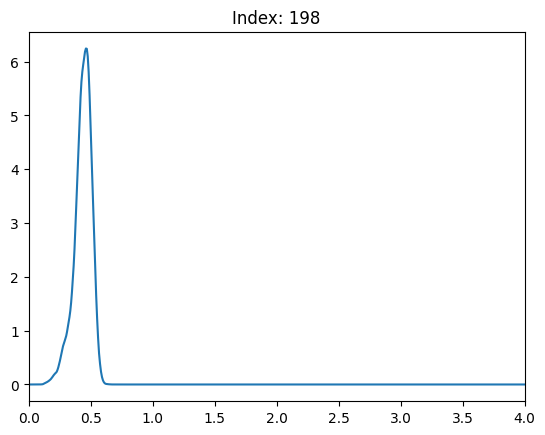

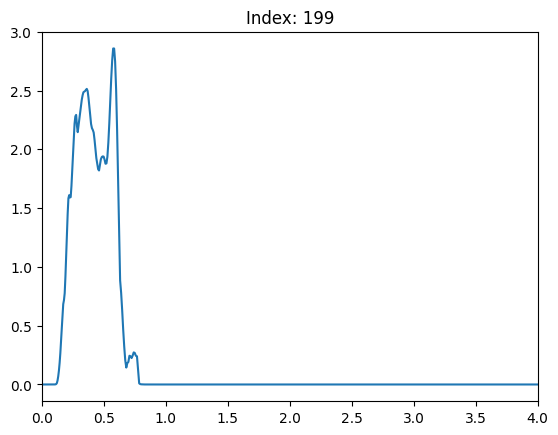

In [179]:
import matplotlib.pyplot as plt

for i in range(100,200):
    plt.figure()  # Create a new figure for each iteration
    plt.plot(self.zgrid, np.exp(self.lnp[i, :]))
    plt.xlim(0, 4)
    plt.title(f"Index: {i}")  # Set the title to include the index

plt.show()  # Display all the plots at once


(0.0, 4.0)

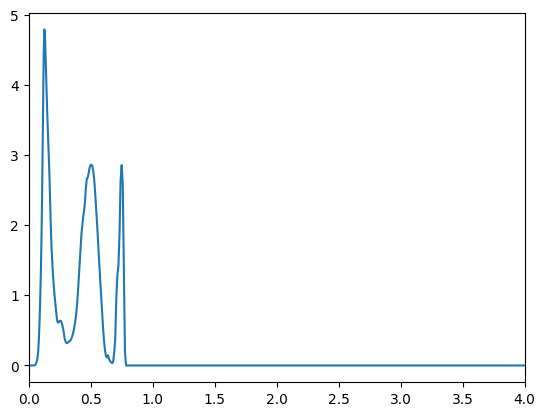

In [176]:


ind = 12

# self.full_logprior[ind,:]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

plt.xlim(0,4)

# best_z_val=common_z_grid[np.where(np.exp(self.lnp[ind,:])==max(np.exp(self.lnp[ind,:])))[0][0]]

In [180]:
degen_example = np.array([0,2,6,7,9,12,25,27,32,41,46,49,56,66,68,69,75,78,84,86,88,90,91,92,103,107,108,110,111,116,120,121,124,129,137,141,142,143,144,147,150,154,159,160,161,163,164,170,174,177,180,181,182,193,196,199
])

nan

In [54]:
# using EAZY z-grid as the common z_grid


common_z_grid = self.zgrid

### Now we find degenerate (double-peaked) galaxies in EAZY


In [93]:
deg_index = []
for i in range(len(z_spec)):
    peaks, _ = find_peaks(np.exp(self.lnp[i,:]), height=7)
    
    if len(peaks) >= 2:
        deg_index.append(i)
        
        
   

In [94]:
len(deg_index)

814

In [177]:
# deg_index

In [157]:
from scipy.signal import find_peaks

deg_index = []

for i in range(len(z_spec)):
    data = np.exp(self.lnp[i, :])
    peaks, _ = find_peaks(data, height=7)
    
    if len(peaks) >= 2:
        peak_positions = np.where(peaks)[0]  # Get the positions of the peaks
        peak_distances = np.diff(peak_positions)  # Calculate the distances between peaks

        # Check if the minimum peak separation is at least 0.2
        if np.min(peak_distances) >= 1:
            deg_index.append(i)


In [159]:
# deg_index

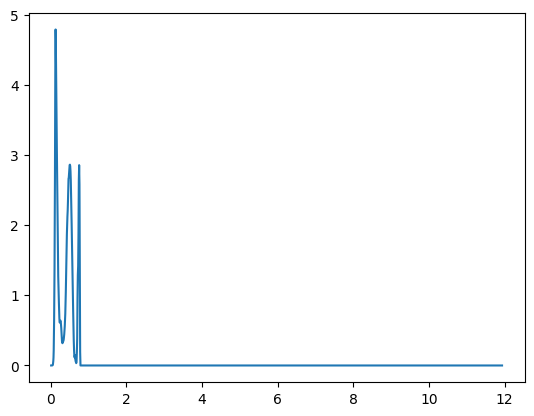

In [227]:


ind = degen_example[5]

# self.full_logprior[ind,:]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

# best_z_val=common_z_grid[np.where(np.exp(self.lnp[ind,:])==max(np.exp(self.lnp[ind,:])))[0][0]]

### Example of a redshift probability density for a degenerate galaxy from EAZY

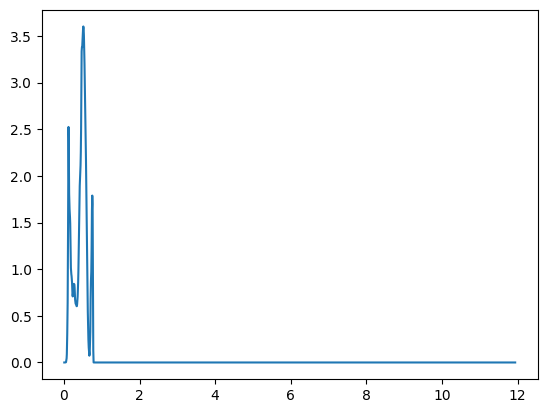

In [203]:


ind = degen_example[2]

# self.full_logprior[ind,:]
plt.plot(self.zgrid,np.exp(self.lnp[ind,:]))

# best_z_val=common_z_grid[np.where(np.exp(self.lnp[ind,:])==max(np.exp(self.lnp[ind,:])))[0][0]]

In [54]:
# for i in range(len(deg_optical_index)):
    
#     plt.figure()
#     plt.plot(common_z_grid, np.exp(self.lnp[deg_optical_index[i],:]))
#     plt.title(f"index {deg_optical_index[i]}")
    
#     plt.xlim(0,7)
#     plt.legend()
#     plt.show()
    
    

In [204]:
#list of bad/degenerate galaxies that we want to fix

degen_galaxies = np.array([0,2,6,7,9,12,25,27,32,41,46,49,56,66,68,69,75,78,84,86,88,90,91,92,103,107,108,110,111,116,120,121,124,129,137,141,142,143,144,147,150,154,159,160,161,163,164,170,174,177,180,181,182,193,196,199
])

## ###############################
# FIR/Submm PHOTOMETRY
## ###############################

In [205]:
#Defining the constants
c = scipy.constants.c
Beta=1.5
nu_scale=1e9
A_scale=1e-11
alpha_scale = 1e5
f = (scipy.constants.h)/(scipy.constants.k)*nu_scale
upper_bound_b = c/(8*1e-6)/nu_scale
lower_bound_c = c/(1000*1e-6)/nu_scale
amplitude_spread=0.5

wavelen_obs = np.array([250,350,500])*(10**-6)

freq_obs = (c/wavelen_obs)/nu_scale



### Assuming a modified blackbody model, we use MCMC to find the FIR photometric redshift for a galaxy

In [348]:
#get redshift and temperature for any galaxies

def get_z_and_T_for_one_galaxy(index_number):
    
    try:
    

        FIR_flux = np.array([F250[index_number],F350[index_number],F500[index_number]])

        FIR_flux_error = 0.2* FIR_flux
#         np.array([e_F250[index_number],e_F350[index_number],e_F500[index_number]])


        lt_params = [889.0588851152065, 2.5040970376568774]
#         lt_params = [380, 2.6940970376568774]
    #     lt_params = [23133.618537869013, 1.55067652]
        index_number = index_number
        def compute_lum_dist(z_input):
            """
            Return the luminosity distance in SI units given redshift
            """
            return Distance(z=z_input, cosmology=Planck15).si.value

        def lt(e,lt_params):
            #return (10**(np.polyval(best_fit_poly, e))) * 3.828e26 

            alpha=lt_params[0]
            gamma=lt_params[1]

            return (alpha*1e5) * e**gamma * 3.828e26 

        def modified_blackbody_distribution(nu, T, A):

            B_nu = (nu**3) / (np.exp(f*nu / T) - 1)

            S_nu = (A*A_scale)  * (nu**Beta) * B_nu  

            return S_nu

        def modified_blackbody_distribution_with_lt(nu, lt_params, T_em, z):

            func_to_integrate = lambda nu1: modified_blackbody_distribution(nu1, T = T_em, A=1)

            S=(1+z)**(-Beta-4)*integrate.quad(func_to_integrate, lower_bound_c, upper_bound_b)[0]*nu_scale*1e-3*1e-26

            A=lt(T_em,lt_params)/(4*np.pi*compute_lum_dist(z)**2*S) 

            return modified_blackbody_distribution(nu, T_em/(1+z), A)

        def residual(p):
            v = p.valuesdict()

            return (modified_blackbody_distribution_with_lt(freq_obs, lt_params, v['T0'], v['z0']) - FIR_flux) / FIR_flux_error
        
        
        
        def chi_sq():
            
            chi_res = ((modified_blackbody_distribution_with_lt(freq_obs,lt_params,mi.params['T0'].value,mi.params['z0'].value) - FIR_flux) / FIR_flux_error)**2
            
            N = 3
            
            P = 2
            
            chi2 = np.sum(chi_res) / (N - P) 
            
            return chi2
        
        
        #Start MCMC

        MCMC_steps = 3000
        # Set initial fit parameters
        p0 = (20, 1)


        p = lmfit.Parameters()
        p['T0'] = lmfit.Parameter(name='T0', value=p0[0], min=5, max=60)
        p['z0'] = lmfit.Parameter(name='z0', value=p0[1], min=np.min(common_z_grid), max=np.max(common_z_grid))

        # Obtain initial fit using minimizers, use residual
        #not change residual here
        mi = lmfit.minimize(residual, params=p, method='ampgo')



        try:

            res = lmfit.minimize(residual, method='emcee', burn=300, steps=MCMC_steps, thin=10,
                                params=mi.params, is_weighted=True, progress= False)
        except:

            res = -np.inf


        # Convert MCMC outputs to gaussian kde

        # Get MCMC outputs
        Ts = np.array(res.flatchain['T0'])
        zs = np.array(res.flatchain['z0'])

        # Define normalized pdf over fit params
        values = np.vstack([Ts, zs])
        kde_kernel = gaussian_kde(values)

        ######Plot MCMC result
        K = 511
        L = 511
        T_grid = np.linspace(5, 60, K)
        z_grid = common_z_grid
    #     np.linspace(0.01, 5, L)
        p_T_z=np.zeros((K,L))
        for i in range(K):
            for j in range(L):
                p_T_z[i,j]=kde_kernel.pdf(np.array([T_grid[i], z_grid[j]]))[0]
    #     plt.figure()
    #     plt.imshow(p_T_z,origin='lower')

        p_T=np.array([simps(p_T_z[i,:], z_grid) for i in range(L)])
        p_z=np.array([simps(p_T_z[:,i], T_grid) for i in range(K)])

        best_z_val=z_grid[np.where(np.array(p_z)==max(p_z))[0][0]]
        best_T_val=T_grid[np.where(np.array(p_T)==max(p_T))[0][0]]





        #Define confidence interval
        p=0.68

        #Smooth histogram with Gaussian kernel
        p_z_smooth=gaussian_filter1d(p_z,1.5)


        #Caculate probabilities per bin
        p_z_bin=p_z_smooth/np.sum(p_z_smooth)


        #Sort probabilities
        p_z_bin_sorted,x_z_sorted=zip(*sorted(zip(p_z_bin, z_grid),reverse=True))



        #Add probabilities until confidence interval is reached
        idx=0
        PZ=p_z_bin_sorted[idx]


        while PZ < p:
            idx+=1

            PZ+=p_z_bin_sorted[idx]

        #Find min and max x value in probabilities subset
        x_z_min=np.min(x_z_sorted[:idx+1])
        x_z_max=np.max(x_z_sorted[:idx+1])

        #Find best value (either max likelihood or mean)
        # best_val=z_grid[np.where(np.array(p_z_smooth)==max(p_z_smooth))[0][0]]


        #Find uncertainty ranges
        sigma_z_minus=best_z_val-x_z_min
        sigma_z_plus=x_z_max-best_z_val



        plt.figure()

        
        CHI_SQUARED = np.sum(((modified_blackbody_distribution_with_lt(freq_obs,lt_params,mi.params['T0'].value,mi.params['z0'].value)-FIR_flux)/(0.2*FIR_flux))**2)
        

        return np.array([best_z_val,sigma_z_plus,sigma_z_minus,best_T_val,p_z_smooth/np.sum(p_z_smooth), CHI_SQUARED])
    
    except:
        
        return np.array([np.nan,np.nan,np.nan,np.nan, np.nan, np.nan])





In [344]:
# z_spec[0]

In [341]:
# test1 = get_z_and_T_for_one_galaxy(12)

# test1[0]

0.12744085

<Figure size 640x480 with 0 Axes>

## ###############################
# Combining FIR/Submm Photometry with EAZY's OPTICAL Photometry
## ###############################

In [349]:
# a single function that caluclates p(z) optical and FIR (normalzit it) and create joint PDF

import numpy as np
from scipy.interpolate import interp1d

def get_broadband_photometry(galaxy_index):

   
    # Generate example data for two PDFs
    # p1_z = np.exp(self.lnp[ind,:])
    
    
    z_photo_ATLAS = z_photo[galaxy_index]
    
    get_pdz_and_chi2 = get_z_and_T_for_one_galaxy(galaxy_index)
    
    p_FIR_chi2 = get_pdz_and_chi2[5]
    
    if (p_FIR_chi2 < 2):
        
        p_FIR = get_pdz_and_chi2[4]
        
    else:
        
        p_FIR = np.ones(len(get_pdz_and_chi2[4]))
    
    
    

    p_FIR /= np.sum(p_FIR)
    
    
    
    p_optical = np.exp(self.lnp[galaxy_index,:])
    p_optical /= np.sum(p_optical)
    
    
    z_EAZY = common_z_grid[np.where(np.array(p_optical)==max(p_optical))[0][0]]


    # Normalize the combined PDF
    
    try:
        combined_pdf = (p_FIR * p_optical)/(np.sum(p_FIR * p_optical))
        
        z_photo_mine = common_z_grid[np.where(np.array(combined_pdf)==max(combined_pdf))[0][0]]
        
    except:
        
        
        combined_pdf = p_optical
        
        z_photo_mine = z_EAZY


    

    plt.plot(common_z_grid, combined_pdf, label='Combined')
    plt.plot(common_z_grid, p_optical, label='Optical')
    plt.plot(common_z_grid, p_FIR, label='Submm')

    plt.axvline(x=z_spec[galaxy_index], color='red', linestyle='--', label = 'Spec-z' )



    # z_cosmos_optical[ind]

    # plt.plot(common_grid, combined_pdf, label='Combined PDF')


    # plt.axvline(x=z_galaxy683_cosmos, color='red', linestyle='--', label = 'simulated z' )
    
    plt.xlim(0,2)
    
    plt.xlabel('z', fontsize = 12)
    plt.ylabel('Probability density', fontsize = 12)

    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    return np.array([z_photo_mine,z_spec[galaxy_index],z_EAZY,z_photo_ATLAS])

    
    

## Examples of fixing a degeneracy using FIR/Submm bands

In [239]:
degen_example[5]

12

In [263]:
np.mean(z_spec)

0.24322659

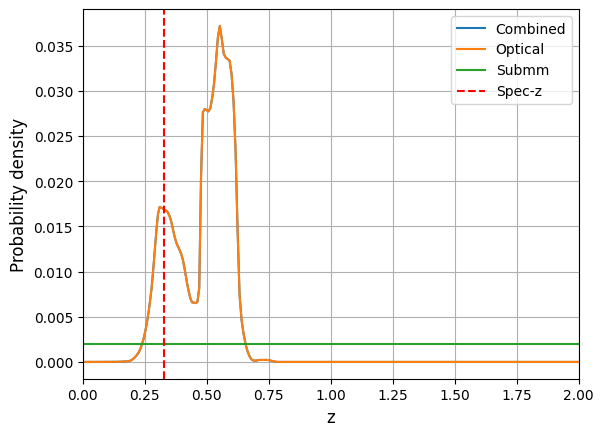

Time taken: 102.120221 seconds


In [352]:
import time

# Record start time
start_time = time.time()

get_broadband_photometry(120)

# Your code to be measured

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken: {elapsed_time:.6f} seconds")


### Now we do this for bunch of galaxies, and see for how many galaxies it gets better

In [251]:
len(degen_example)

56

_____________ Galaxy ID :  0


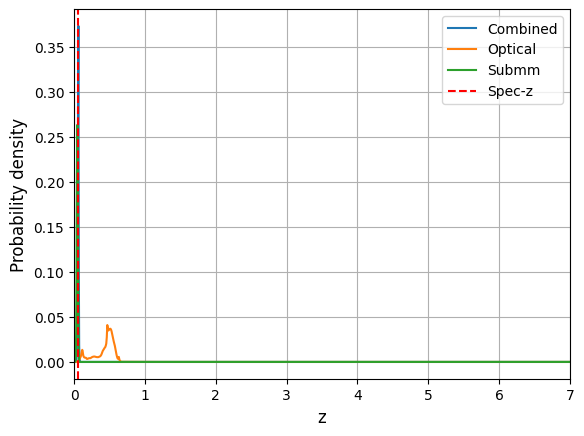

_____________ Galaxy ID :  2


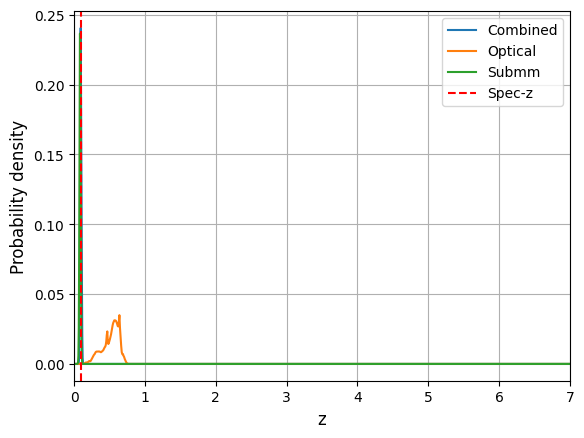

_____________ Galaxy ID :  6


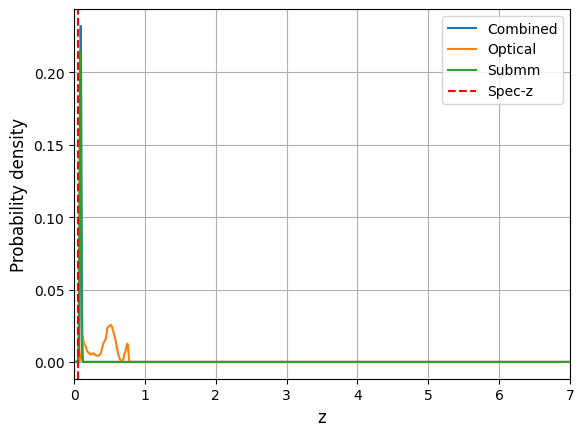

_____________ Galaxy ID :  7


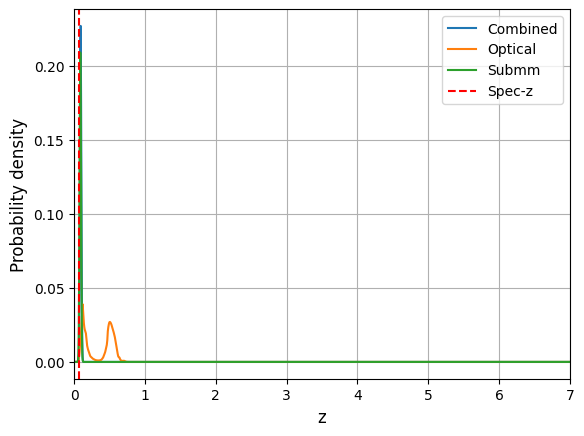

_____________ Galaxy ID :  9


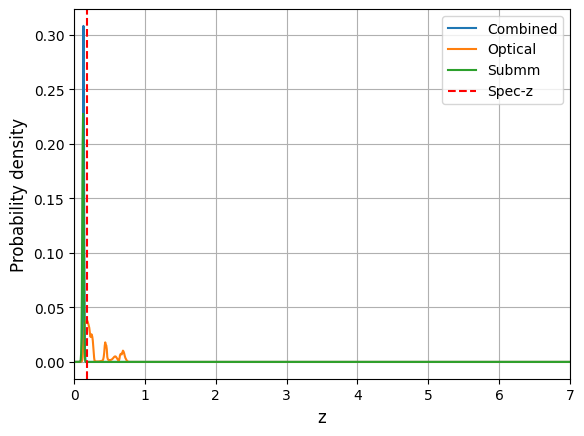

_____________ Galaxy ID :  12


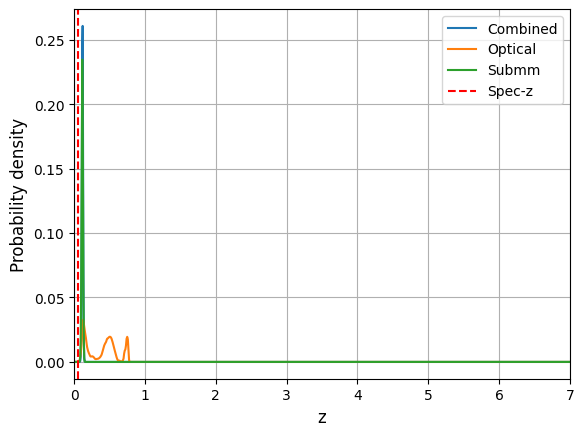

_____________ Galaxy ID :  25


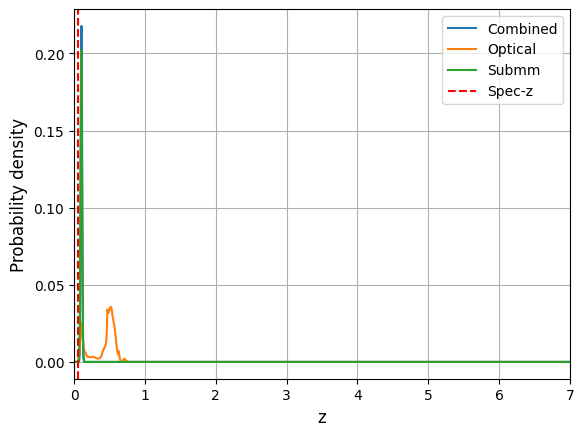

_____________ Galaxy ID :  27


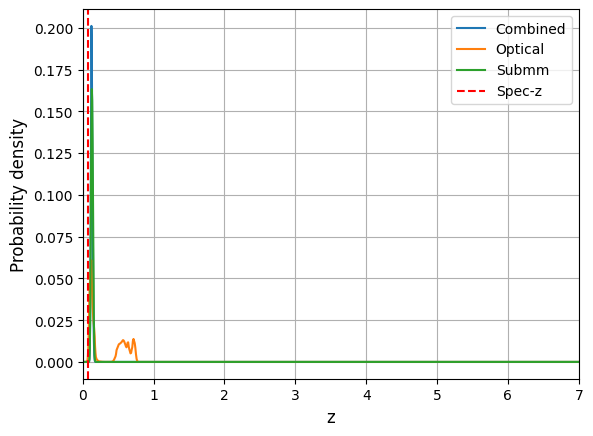

_____________ Galaxy ID :  32


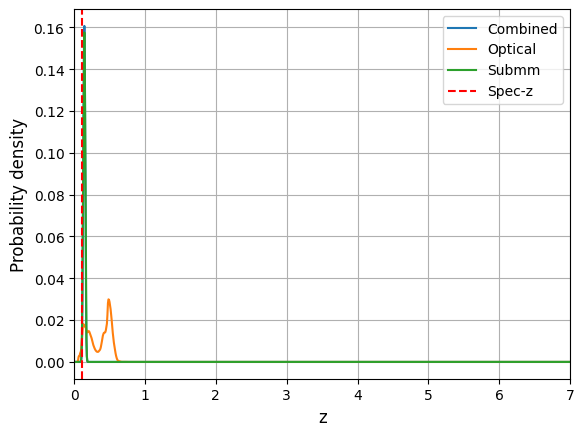

_____________ Galaxy ID :  41


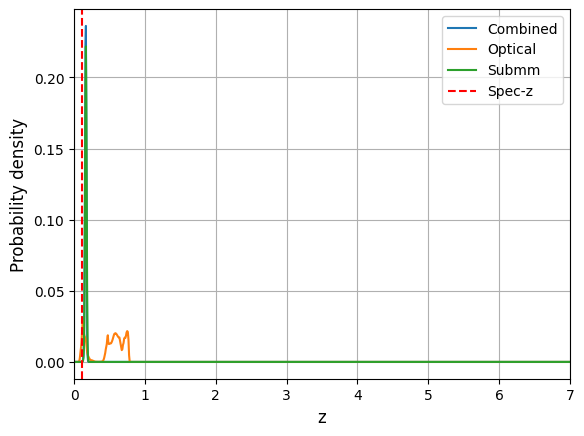

_____________ Galaxy ID :  46


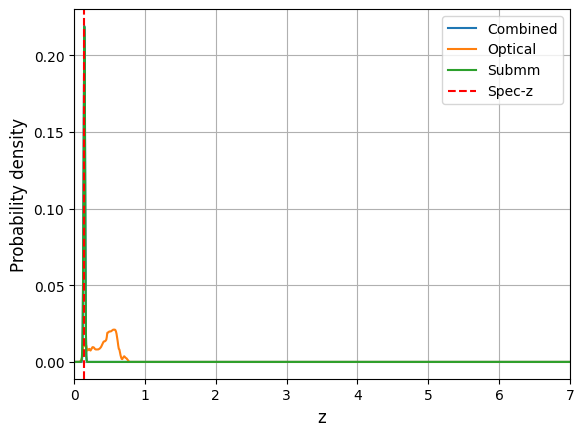

_____________ Galaxy ID :  49


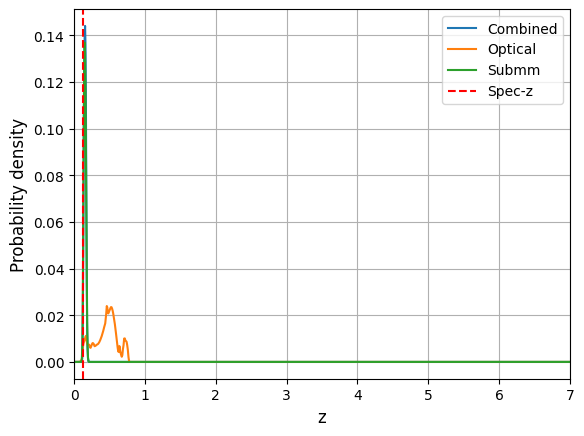

_____________ Galaxy ID :  56


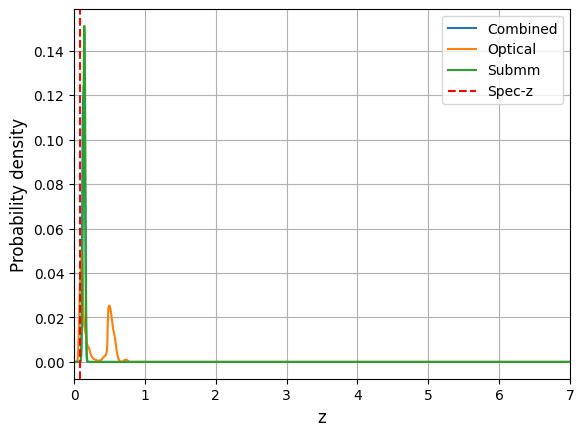

_____________ Galaxy ID :  66


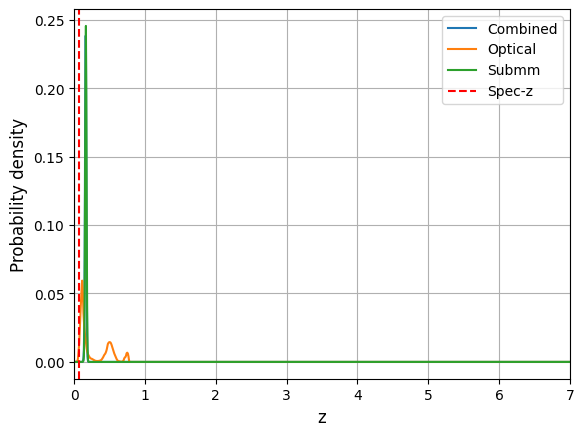

_____________ Galaxy ID :  68


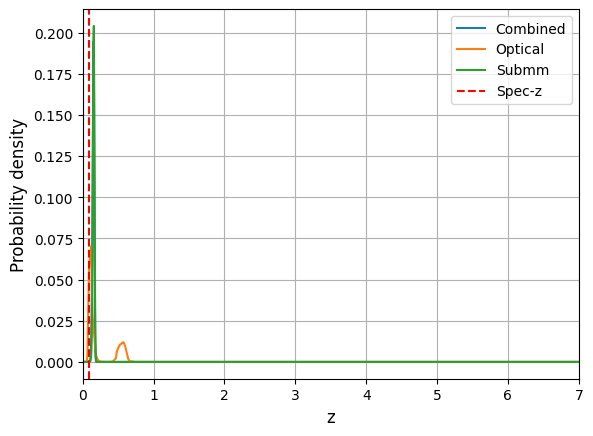

_____________ Galaxy ID :  69


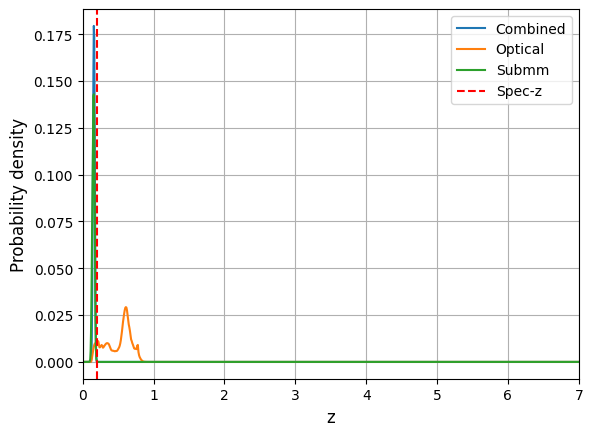

_____________ Galaxy ID :  75


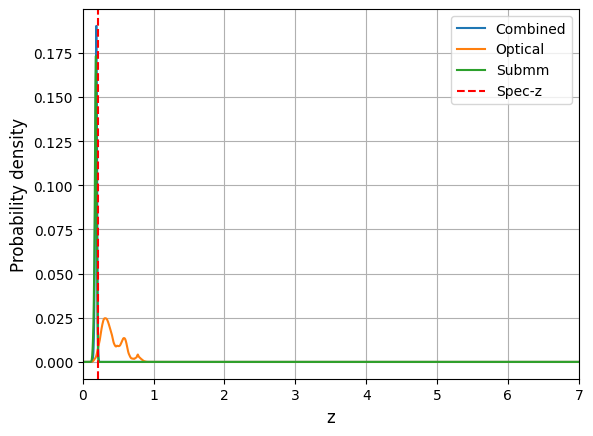

_____________ Galaxy ID :  78


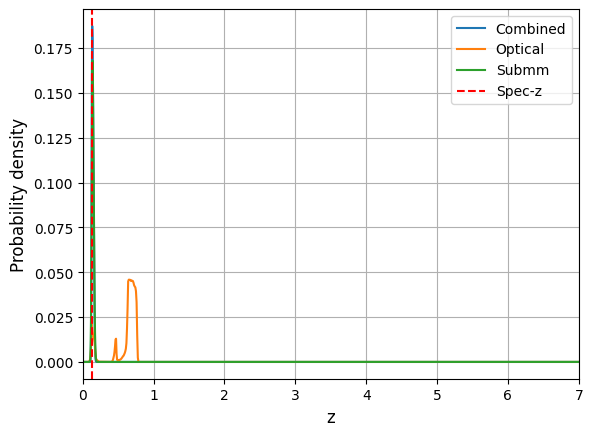

_____________ Galaxy ID :  84


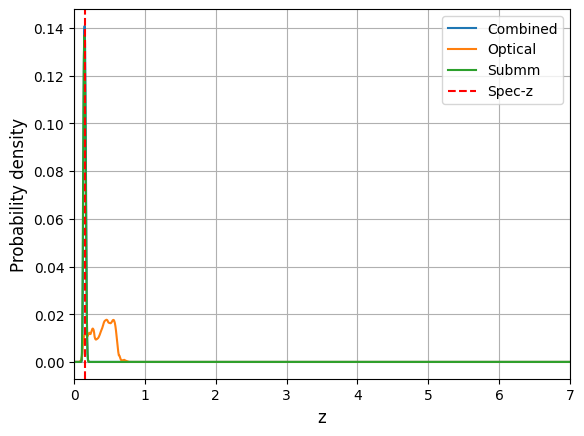

_____________ Galaxy ID :  86


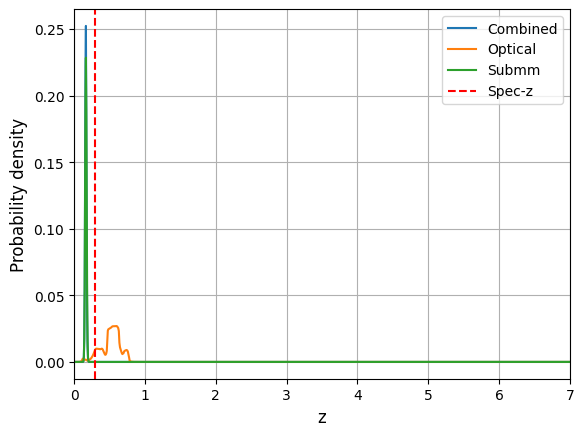

_____________ Galaxy ID :  88


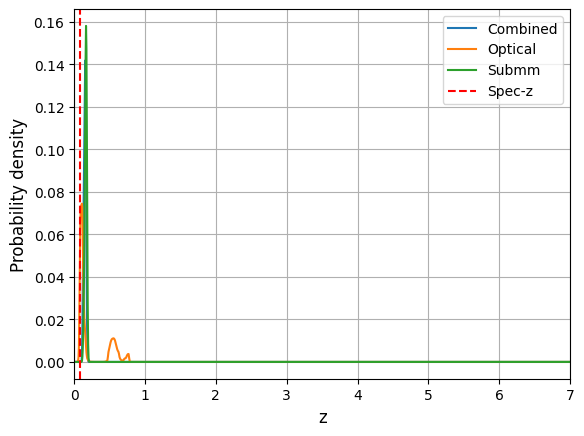

_____________ Galaxy ID :  90


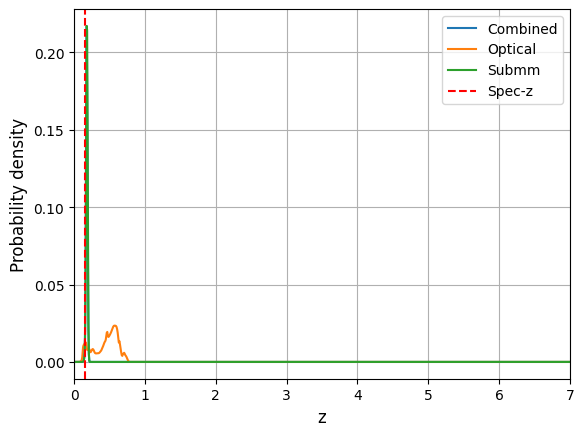

_____________ Galaxy ID :  91


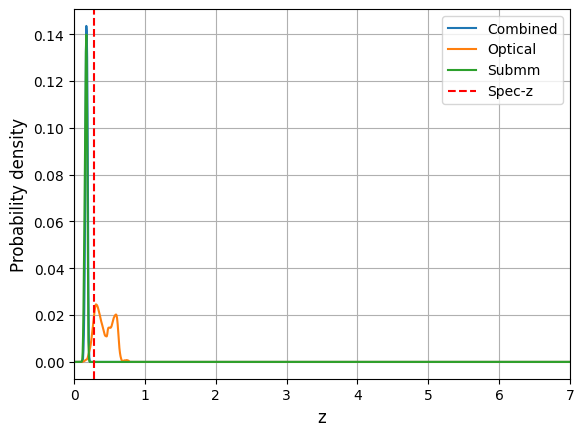

_____________ Galaxy ID :  92


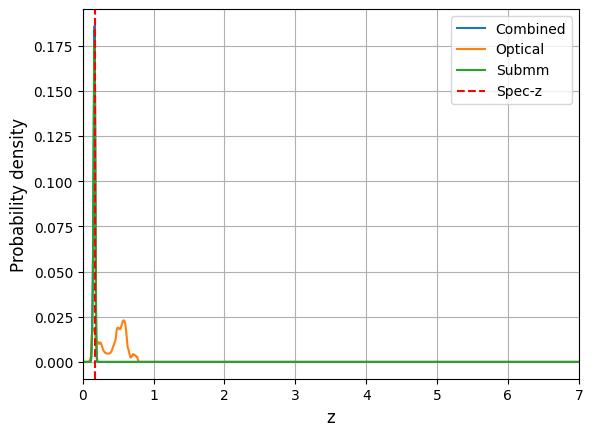

_____________ Galaxy ID :  103


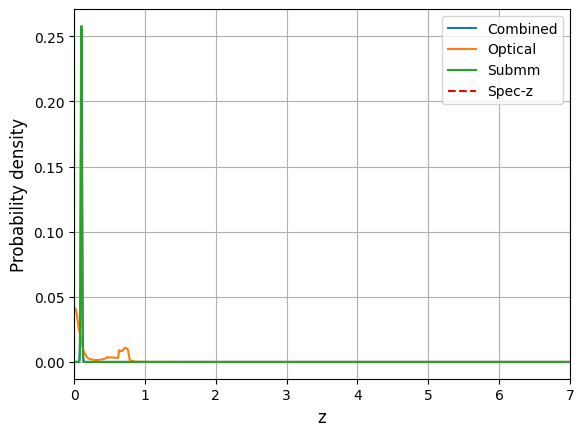

_____________ Galaxy ID :  107


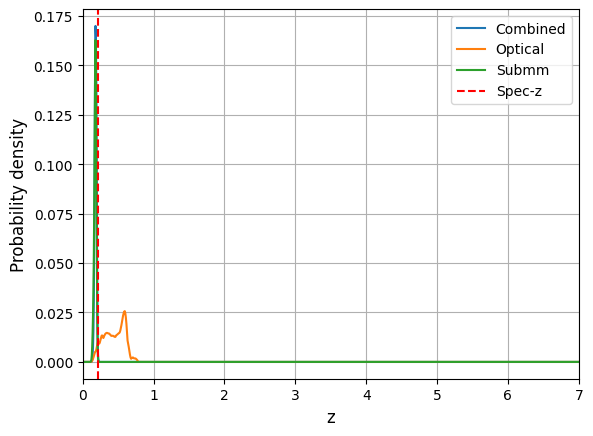

_____________ Galaxy ID :  108


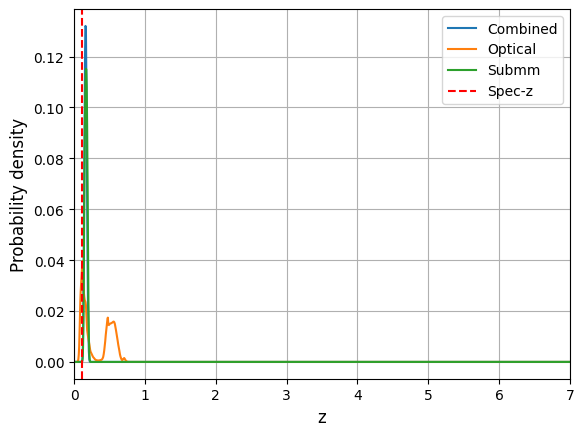

_____________ Galaxy ID :  110


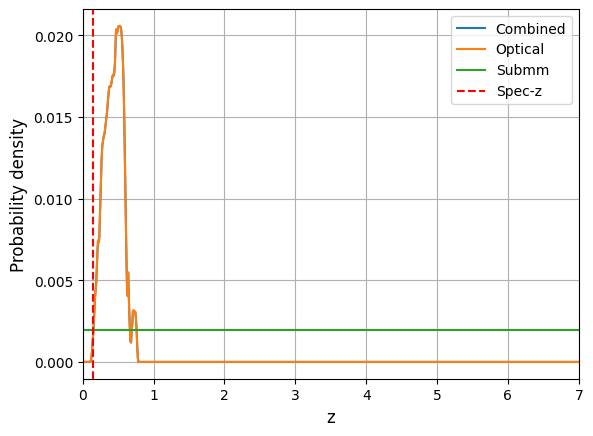

_____________ Galaxy ID :  111


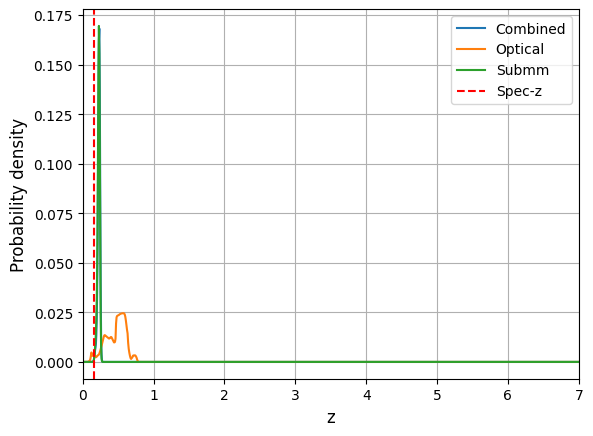

_____________ Galaxy ID :  116


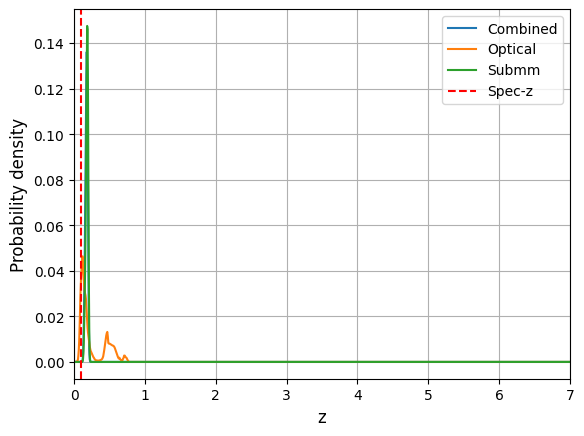

_____________ Galaxy ID :  120


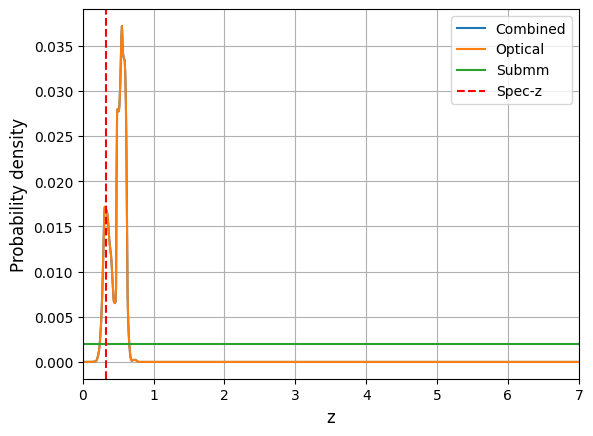

_____________ Galaxy ID :  121


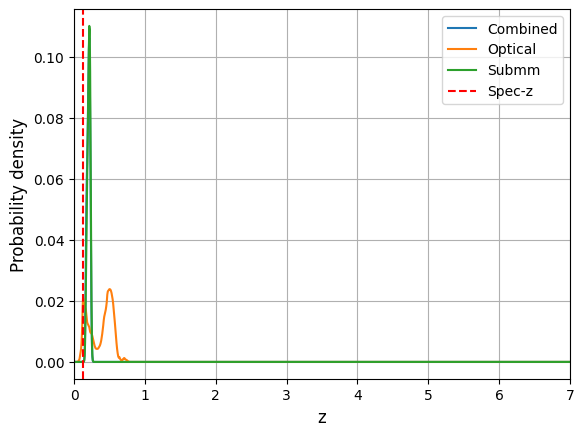

_____________ Galaxy ID :  124


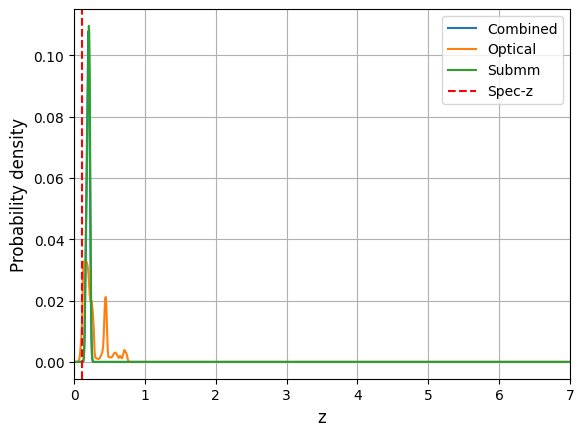

_____________ Galaxy ID :  129


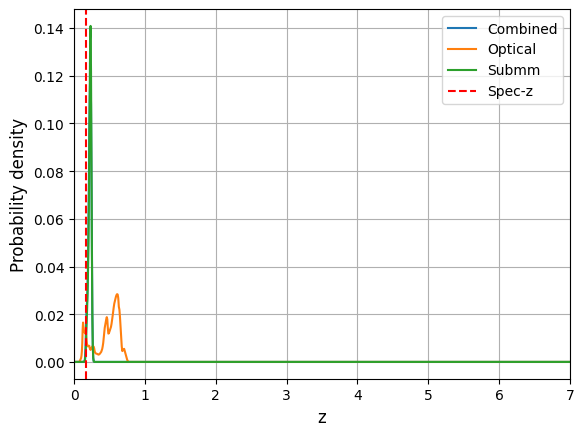

_____________ Galaxy ID :  137


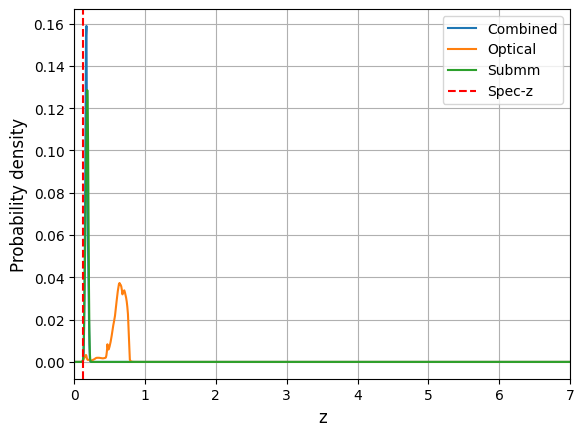

_____________ Galaxy ID :  141


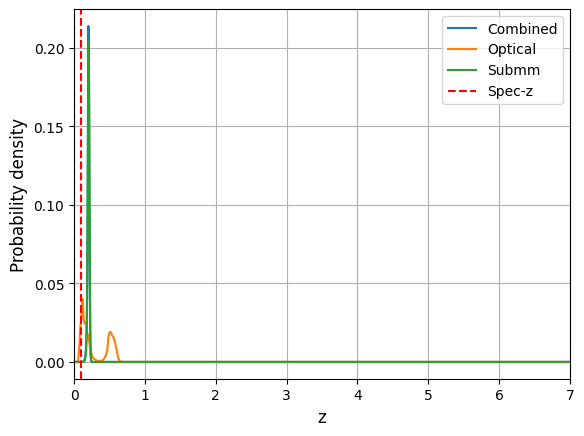

_____________ Galaxy ID :  142


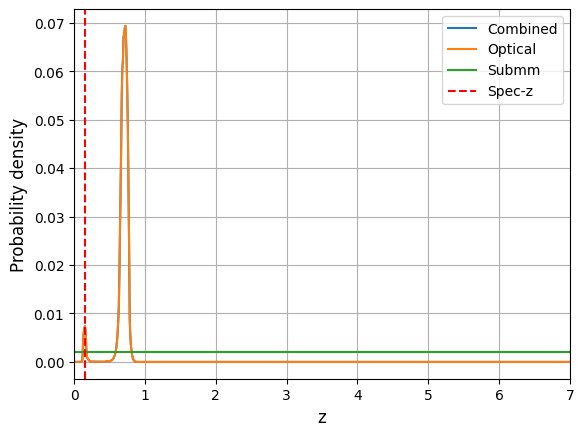

_____________ Galaxy ID :  143


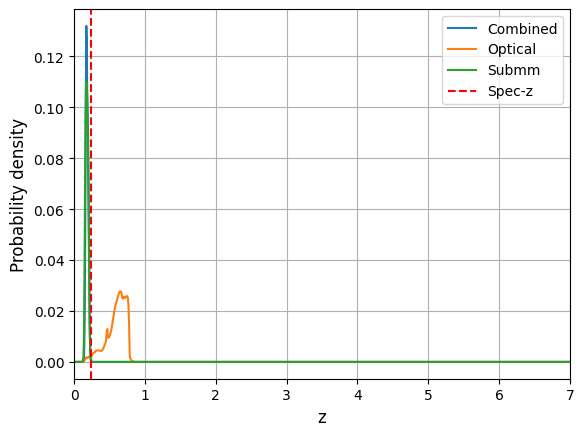

_____________ Galaxy ID :  144


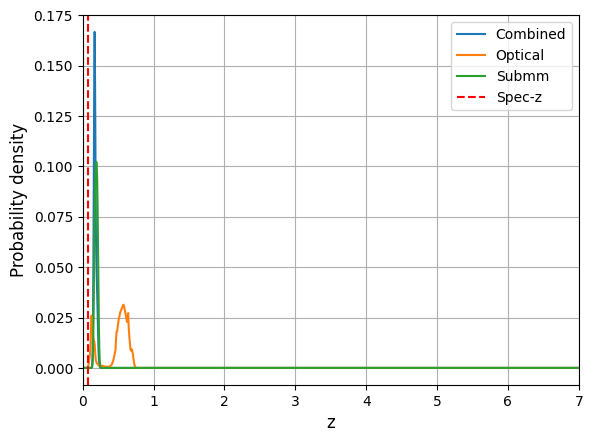

_____________ Galaxy ID :  147


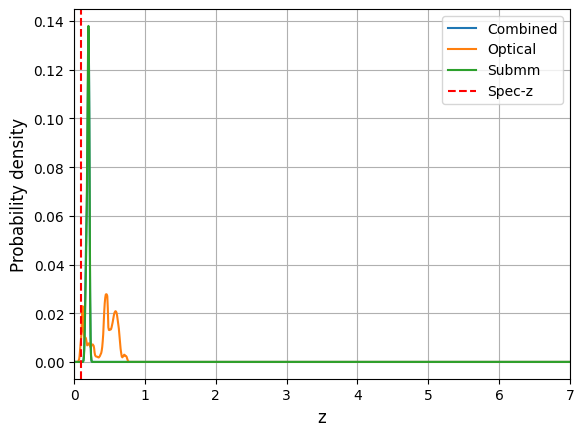

_____________ Galaxy ID :  150


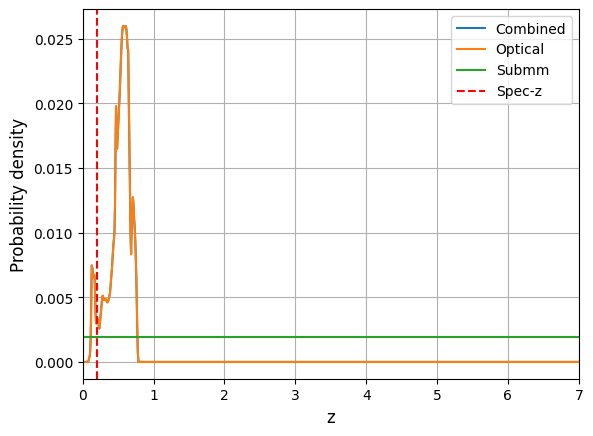

_____________ Galaxy ID :  154


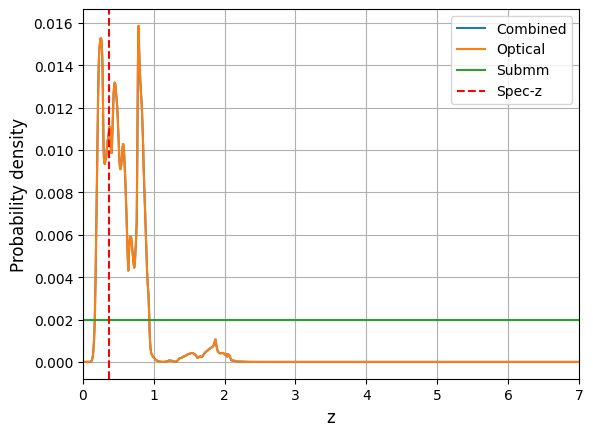

_____________ Galaxy ID :  159


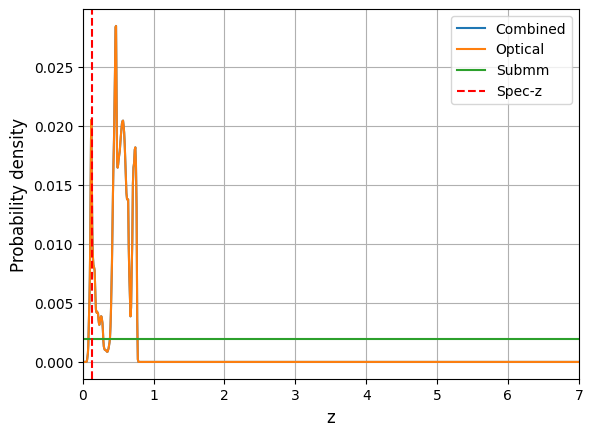

_____________ Galaxy ID :  160


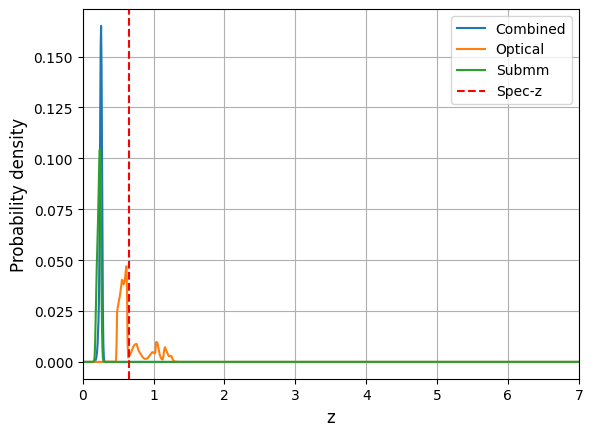

_____________ Galaxy ID :  161


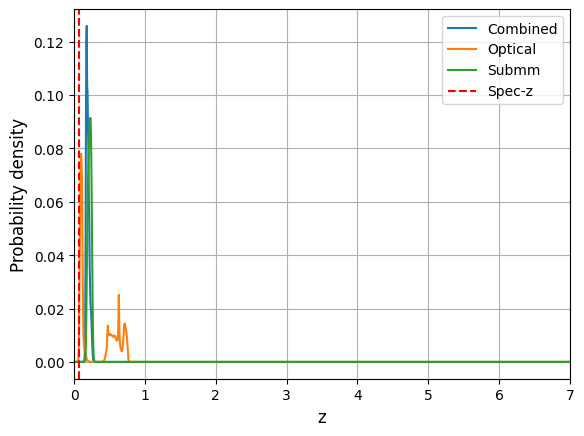

_____________ Galaxy ID :  163


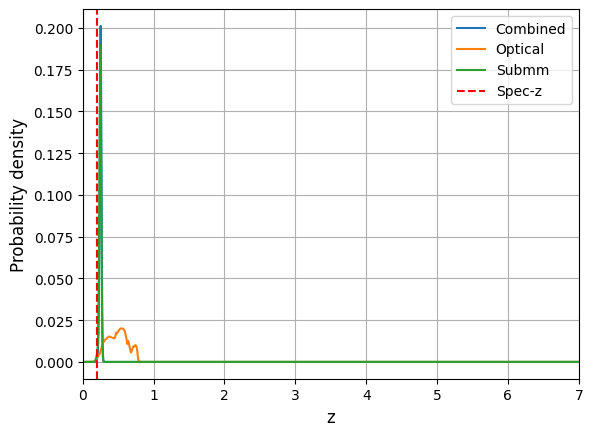

_____________ Galaxy ID :  164


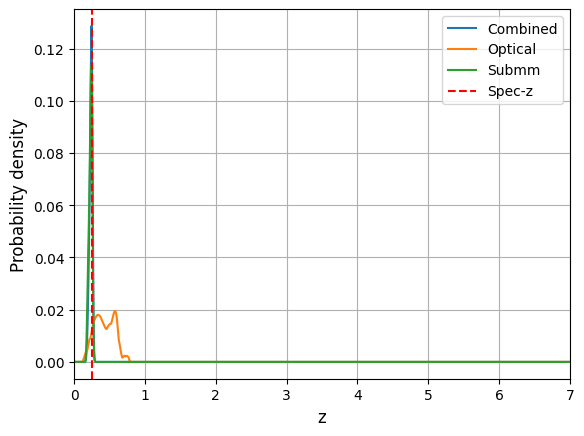

_____________ Galaxy ID :  170


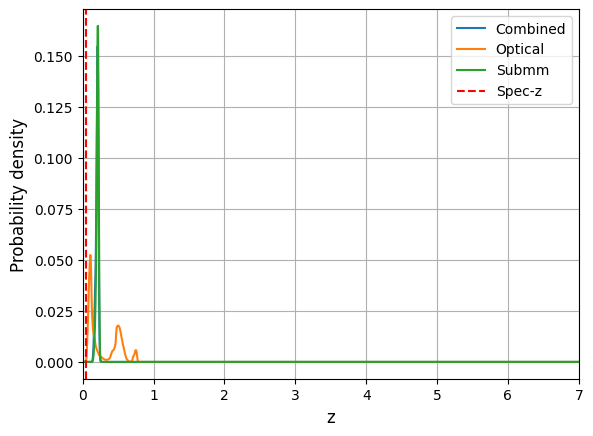

_____________ Galaxy ID :  174


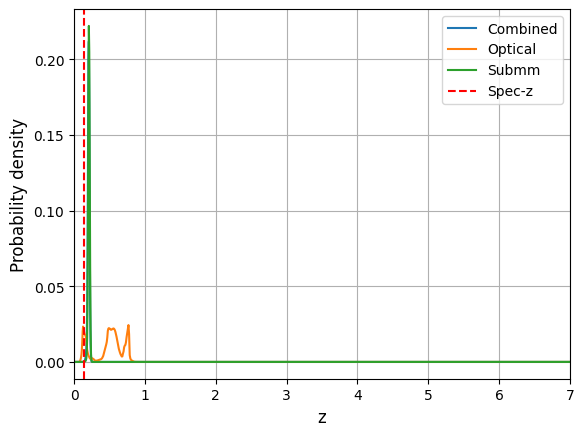

_____________ Galaxy ID :  177


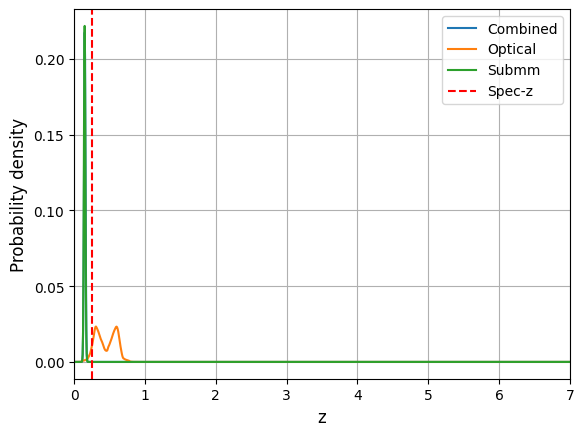

_____________ Galaxy ID :  180


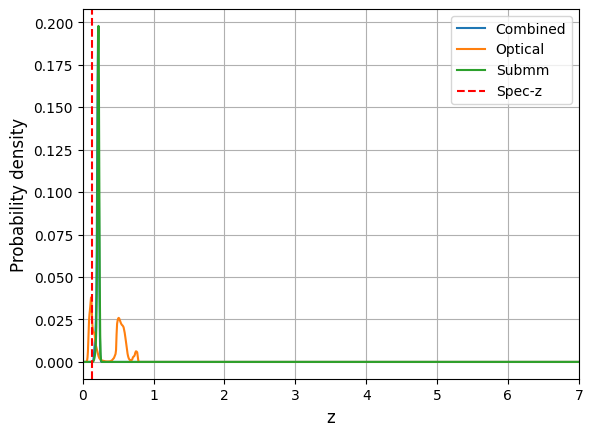

_____________ Galaxy ID :  181


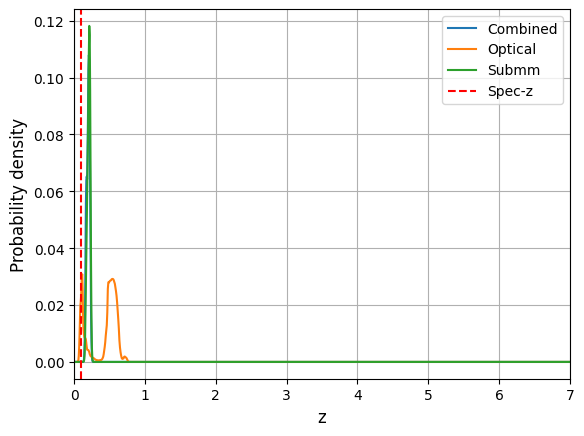

_____________ Galaxy ID :  182


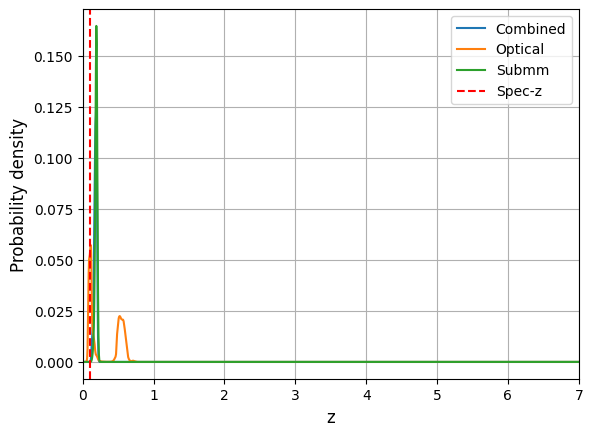

_____________ Galaxy ID :  193


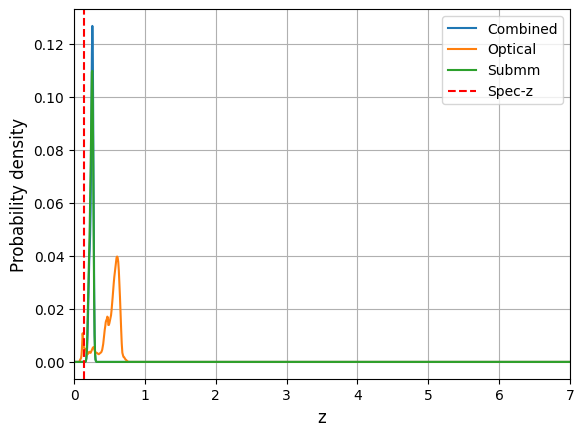

_____________ Galaxy ID :  196


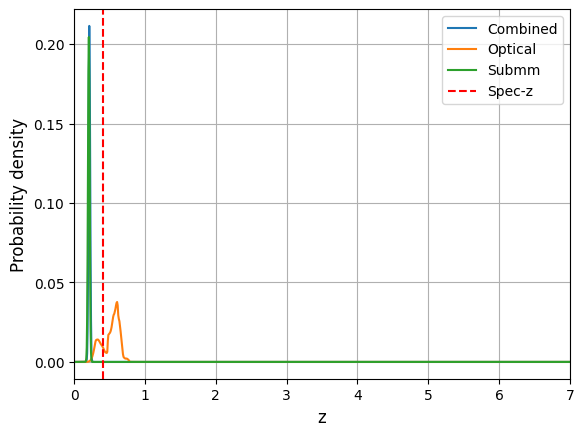

_____________ Galaxy ID :  199


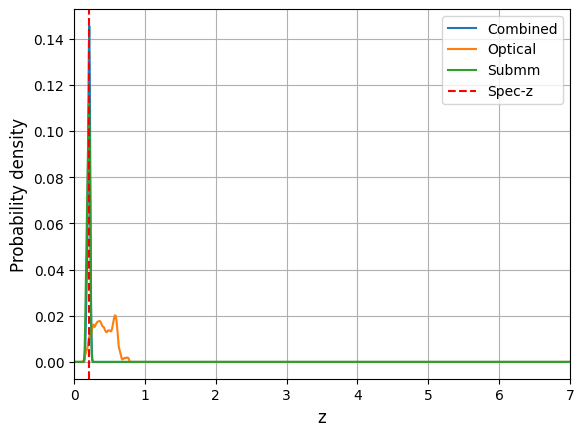

In [252]:
z_photometry_selected200 = []
z_spec_selected200 = []
z_EAZY_selected200 = []
z_photo_ATLAS_selected200 = []

for i in range(len(degen_example)):
    
    index = degen_example[i]
    

    
    print('_____________ Galaxy ID : ', index )   
    
    
    try:
        get_z = get_broadband_photometry(index)
        
        
    except:
        get_z = np.array([np.nan,np.nan,np.nan,np.nan])
        
        
    z_photometry_selected200.append(get_z[0])
    z_spec_selected200.append(get_z[1])
    z_EAZY_selected200.append(get_z[2])
    z_photo_ATLAS_selected200.append(get_z[3])



In [424]:
np.mean(z_spec_selected200)

0.15542035

#(z_spec-z_optical)/z_spec > 1 = 34
#(z_spec-z_combined)/z_spec > 1 = 13


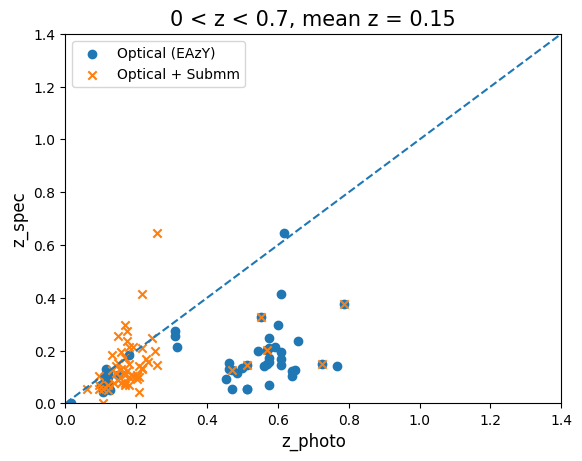

In [425]:
plt.title('z_photo vs z_spec')


plt.title('0 < z < 0.7, mean z = 0.15', fontsize = 15)

plt.scatter(z_EAZY_selected200,z_spec_selected200, label = 'Optical (EAzY)')

plt.scatter(z_photometry_selected200,z_spec_selected200, label = 'Optical + Submm', marker='x')

# plt.scatter(z_photo_dub,z_spec, label = 'Dub Photo')

plt.plot([0,5],[0,5], linestyle = 'dashed')
plt.xlabel('z_photo', fontsize = 12)
plt.ylabel('z_spec', fontsize = 12)

plt.xlim(0,1.4)
plt.ylim(0,1.4)
plt.legend()
plt.plot()

print("#(z_spec-z_optical)/z_spec > 1 = 34")
print("#(z_spec-z_combined)/z_spec > 1 = 13")

In [427]:
len(np.where(np.abs(np.array(z_photometry_selected200)-np.array(z_spec_selected200))/z_spec_selected200 >1)[0])


13

In [428]:
len(np.where(np.abs(np.array(z_EAZY_selected200)-np.array(z_spec_selected200))/z_spec_selected200>1)[0])

34

In [357]:
data_05_1 = fits.getdata('First200_0.5_1_redshif.fits')

# Retrieve the lists
z_photometry_05_1 = data_05_1['z_photo_cal'].tolist()
z_spec_05_1 = data_05_1['z_spec'].tolist()
z_EAZY_05_1 = data_05_1['z_eazy'].tolist()
z_photo_ATLAS_05_1 = data_05_1['z_photo_ATLAS'].tolist()

In [358]:
type(z_photometry_05_1)

list

In [359]:
# z_photometry_combined = z_photometry_selected200 + z_photometry_05_1
# z_spec_combined = z_spec_selected200 + z_spec_05_1
# z_EAZY_combined = z_EAZY_selected200 + z_EAZY_05_1
# z_photo_ATLAS_combined = z_photo_ATLAS_selected200 + z_photo_ATLAS_05_1

#(z_spec-z_optical)/z_spec >1 = 48
#(z_spec-z_combined)/z_spec >1 = 16


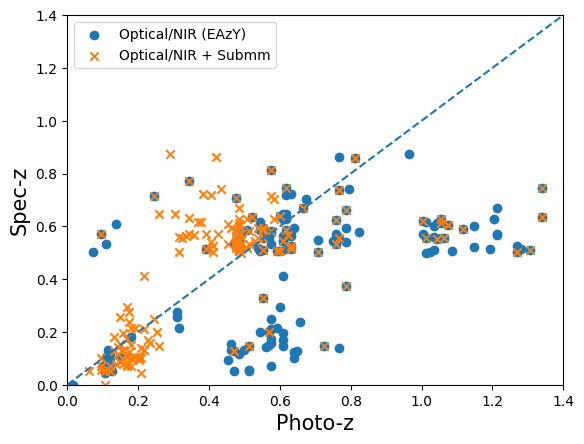

In [435]:



# plt.title('0 < z < 1', fontsize = 15)

plt.scatter(z_EAZY_combined,z_spec_combined, label = 'Optical/NIR (EAzY)')

plt.scatter(z_photometry_combined,z_spec_combined, label = 'Optical/NIR + Submm', marker='x')

# plt.scatter(z_photo_dub,z_spec, label = 'Dub Photo')

plt.plot([0,5],[0,5], linestyle = 'dashed')
plt.xlabel('Photo-z', fontsize = 15)
plt.ylabel('Spec-z', fontsize = 15)

plt.xlim(0,1.4)
plt.ylim(0,1.4)
plt.legend()
print("#(z_spec-z_optical)/z_spec >1 = 48")
print("#(z_spec-z_combined)/z_spec >1 = 16")

0.43706794988088987

In [411]:
print("(z_spec-z_EAZY)/z_spec = 48")

(z_spec-z_EAZY)/z_spec = 48


In [398]:
len(np.where(np.abs(np.array(z_photometry_combined)-np.array(z_spec_combined))/z_spec_combined >1)[0])
len(np.where(np.abs(np.array(z_EAZY_combined)-np.array(z_spec_combined))/z_spec_combined>1)[0])

16

In [444]:
len(np.where(np.abs(np.array(z_EAZY_combined)-np.array(z_spec_combined))/z_spec_combined>2)[0])

25

In [445]:
len(np.where(np.abs(np.array(z_photo_ATLAS_combined)-np.array(z_spec_combined))/z_spec_combined>2)[0])

5

In [409]:
print

\begin{equation}
y = mx + b
\end{equation}


In [ ]:
g13063 = get_broadband_photometry(13063)
g15330 = get_broadband_photometry(15330)

In [ ]:
g21859 = get_broadband_photometry(21859)

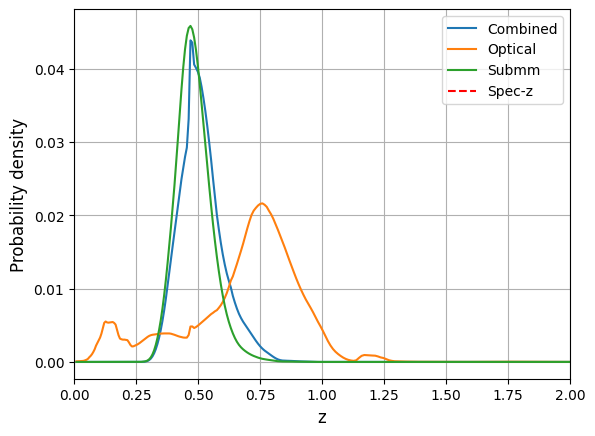

array([0.46954134, 4.6079    , 0.7593604 , 0.46954134], dtype=float32)

In [288]:
get_broadband_photometry(21859)

plt.axvline(x=z_spec[21859], color='red', linestyle='--', label = 'Spec-z' )    

In [291]:
z_spec[21859], z_photo[21859]

(4.6079, 0.412)

In [295]:
# z_photometry_selected200/z_photo_ATLAS_selected200



(0.0, 1.0)

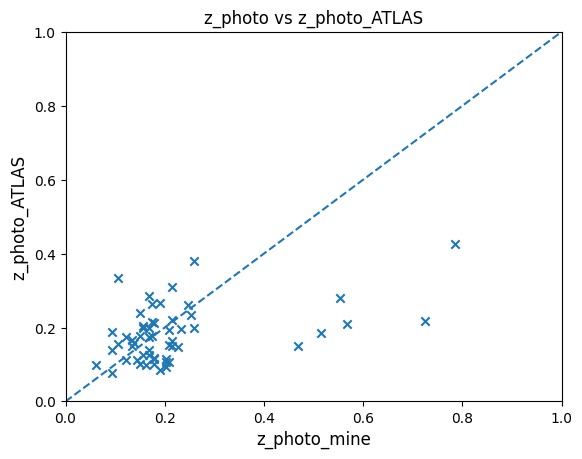

In [323]:
plt.title('z_photo vs z_photo_ATLAS')
plt.scatter(z_photometry_selected200,z_photo[degen_example], marker='x')

# plt.title(' Photo-z  vs Spec-z')

# plt.scatter(z_EAZY_selected200,z_spec_selected200, label = 'Optical (EAzY)')

# plt.scatter(z_photo_dub,z_spec, label = 'Dub Photo')

plt.plot([0,5],[0,5], linestyle = 'dashed')
plt.xlabel('z_photo_mine', fontsize = 12)
plt.ylabel('z_photo_ATLAS', fontsize = 12)

plt.xlim(0,1)
plt.ylim(0,1)
# plt.legend()

In [333]:
np.where(z_photometry_selected200-z_photo[degen_example] > 0.2)

(array([27, 30, 36, 40, 41, 42]),)

In [311]:
# z_photo[degen_example]

(0.0, 2.0)

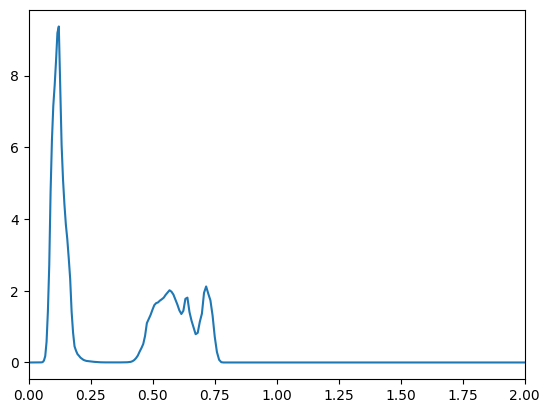

In [331]:
plt.plot(self.zgrid,np.exp(self.lnp[27,:]))
plt.xlim(0,2)

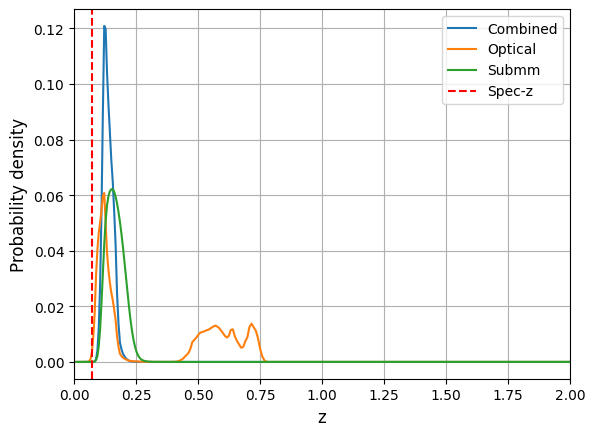

array([0.12181772, 0.07176   , 0.12181772, 0.113     ], dtype=float32)

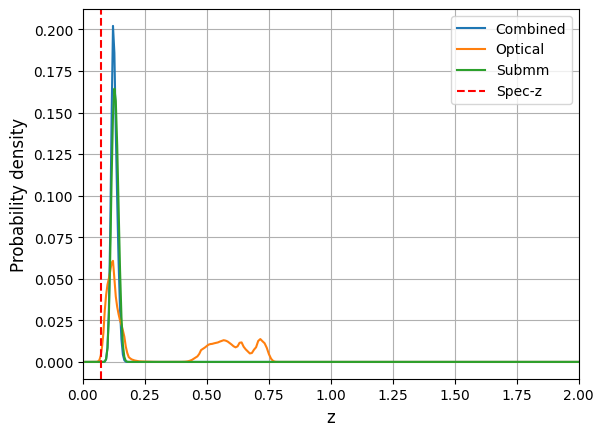

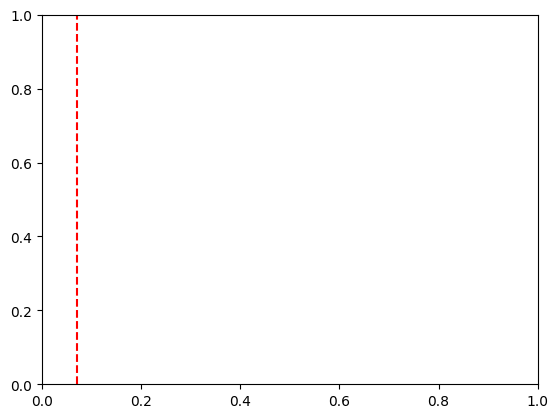

In [315]:
get_broadband_photometry(27)

    

# ############

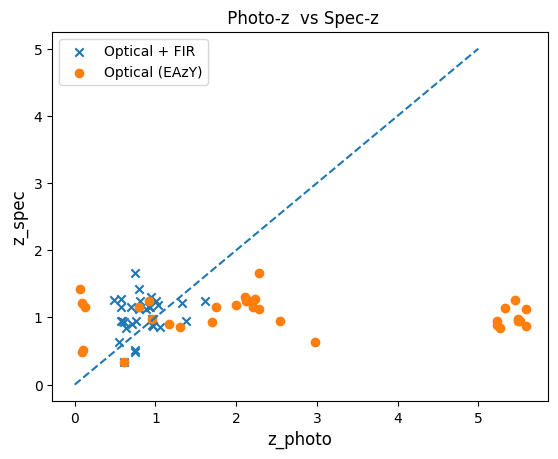

In [194]:

plt.title('z_photo vs z_spec')
plt.scatter(z_photometry_selected,z_spec_selected, label = 'Optical + FIR', marker='x')

plt.title(' Photo-z  vs Spec-z')

plt.scatter(z_EAZY_selected,z_spec_selected, label = 'Optical (EAzY)')

# plt.scatter(z_photo_dub,z_spec, label = 'Dub Photo')

plt.plot([0,5],[0,5], linestyle = 'dashed')
plt.xlabel('z_photo', fontsize = 12)
plt.ylabel('z_spec', fontsize = 12)

plt.legend()

### Let's do this for all the galaxies in the catalog

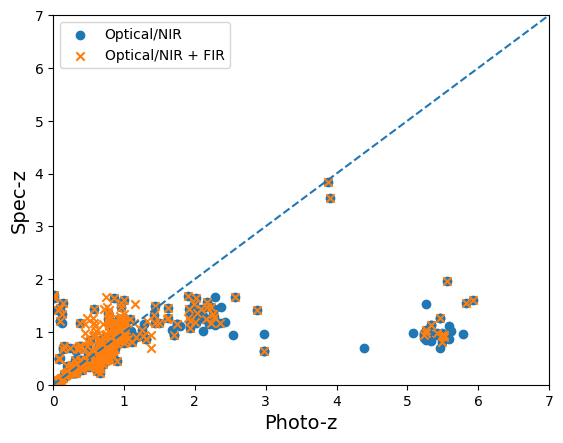

In [552]:

# plt.title('z_photo vs z_spec', fonts)


# plt.title(' Photo-z  vs Spec-z')
plt.scatter(z_EAZY_TEST,z_spec_TEST, label = 'Optical/NIR')

plt.scatter(z_photometry_TEST,z_spec_TEST, label = 'Optical/NIR + FIR', marker='x')





# plt.scatter(z_photo_dub_corrected,z_spec_corrected, label = 'Dub Photo')

plt.plot([0,8],[0,8], linestyle = 'dashed')
plt.xlabel('Photo-z', fontsize = 14)
plt.ylabel('Spec-z', fontsize = 14)

plt.xlim(0,7)
plt.ylim(0,7)

plt.legend()